In [1]:
%matplotlib inline
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
import Methods as m
from build_polynomial import build_poly

# Load the data 

In [4]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 

y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [5]:
def normalize(x):
    centered_data = x - np.mean(x, axis=0)
    std_data = centered_data / np.std(centered_data, axis=0)
    
    return std_data,np.mean(x, axis=0),np.std(centered_data, axis=0)

In [6]:
def number_to_nan(tX):
    for i in range(tX.shape[0]):
        for j in range(tX.shape[1]):
            if(tX[i,j]==-999):
                tX[i,j]=np.nan
    return tX

In [7]:
def number_to_other_number(tX, new_value):
    for i in range(tX.shape[0]):
        for j in range(tX.shape[1]):
            if(tX[i,j]==-999):
                tX[i,j]=new_value
    return tX

In [8]:
def nan_to_median(tX):
    median_per_col=np.nanmedian(tX,axis=0)
    for i in range(tX.shape[0]):
        for j in range(len(median_per_col)):
            if(np.isnan(tX[i,j])):
                tX[i,j]=median_per_col[j]
    return tX,median_per_col

In [9]:
def min_max_transform(x,min_,max_):
    return (x-min_)/(max_-min_)

In [10]:
tX=number_to_nan(tX)
tX0=[]
tX1=[]
tX2=[]

In [11]:
for index, jet_num in enumerate(tX[:,22]):
    if(int(jet_num)==0):
        tX0.append(np.insert(tX[index],0,index))
    if(int(jet_num)==1):
        tX1.append(np.insert(tX[index],0,index))
    if(int(jet_num)==2 or int(jet_num)==3):
        tX2.append(np.insert(tX[index],0,index))
tX0=np.array(tX0)
tX1=np.array(tX1)
tX2=np.array(tX2)

In [12]:
print(tX0.shape)
print(tX1.shape)
print(tX2.shape)

(99913, 31)
(77544, 31)
(72543, 31)


# Tx0 analysis

In [13]:
import pandas as pd
import seaborn as sns

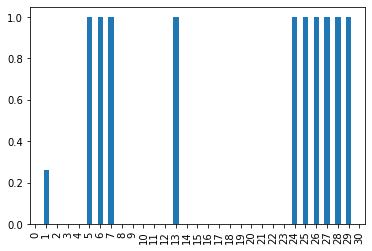

In [14]:


df=pd.DataFrame(tX0)
missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [15]:
tX0_dropped=np.delete(tX0,[5,6,7,13,24,25,26,27,28,29],axis=1)

In [16]:
tX0_dropped[:,1:2], median0=nan_to_median(tX0_dropped[:,1:2])

In [17]:
labels_dropped0=y[tX0_dropped[:,0].astype(int)]
tX0_label0=tX0_dropped[labels_dropped0==-1]
tX0_label1=tX0_dropped[labels_dropped0==1]
print(len(tX0_label0))
print(len(tX0_label1))

74421
25492


//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


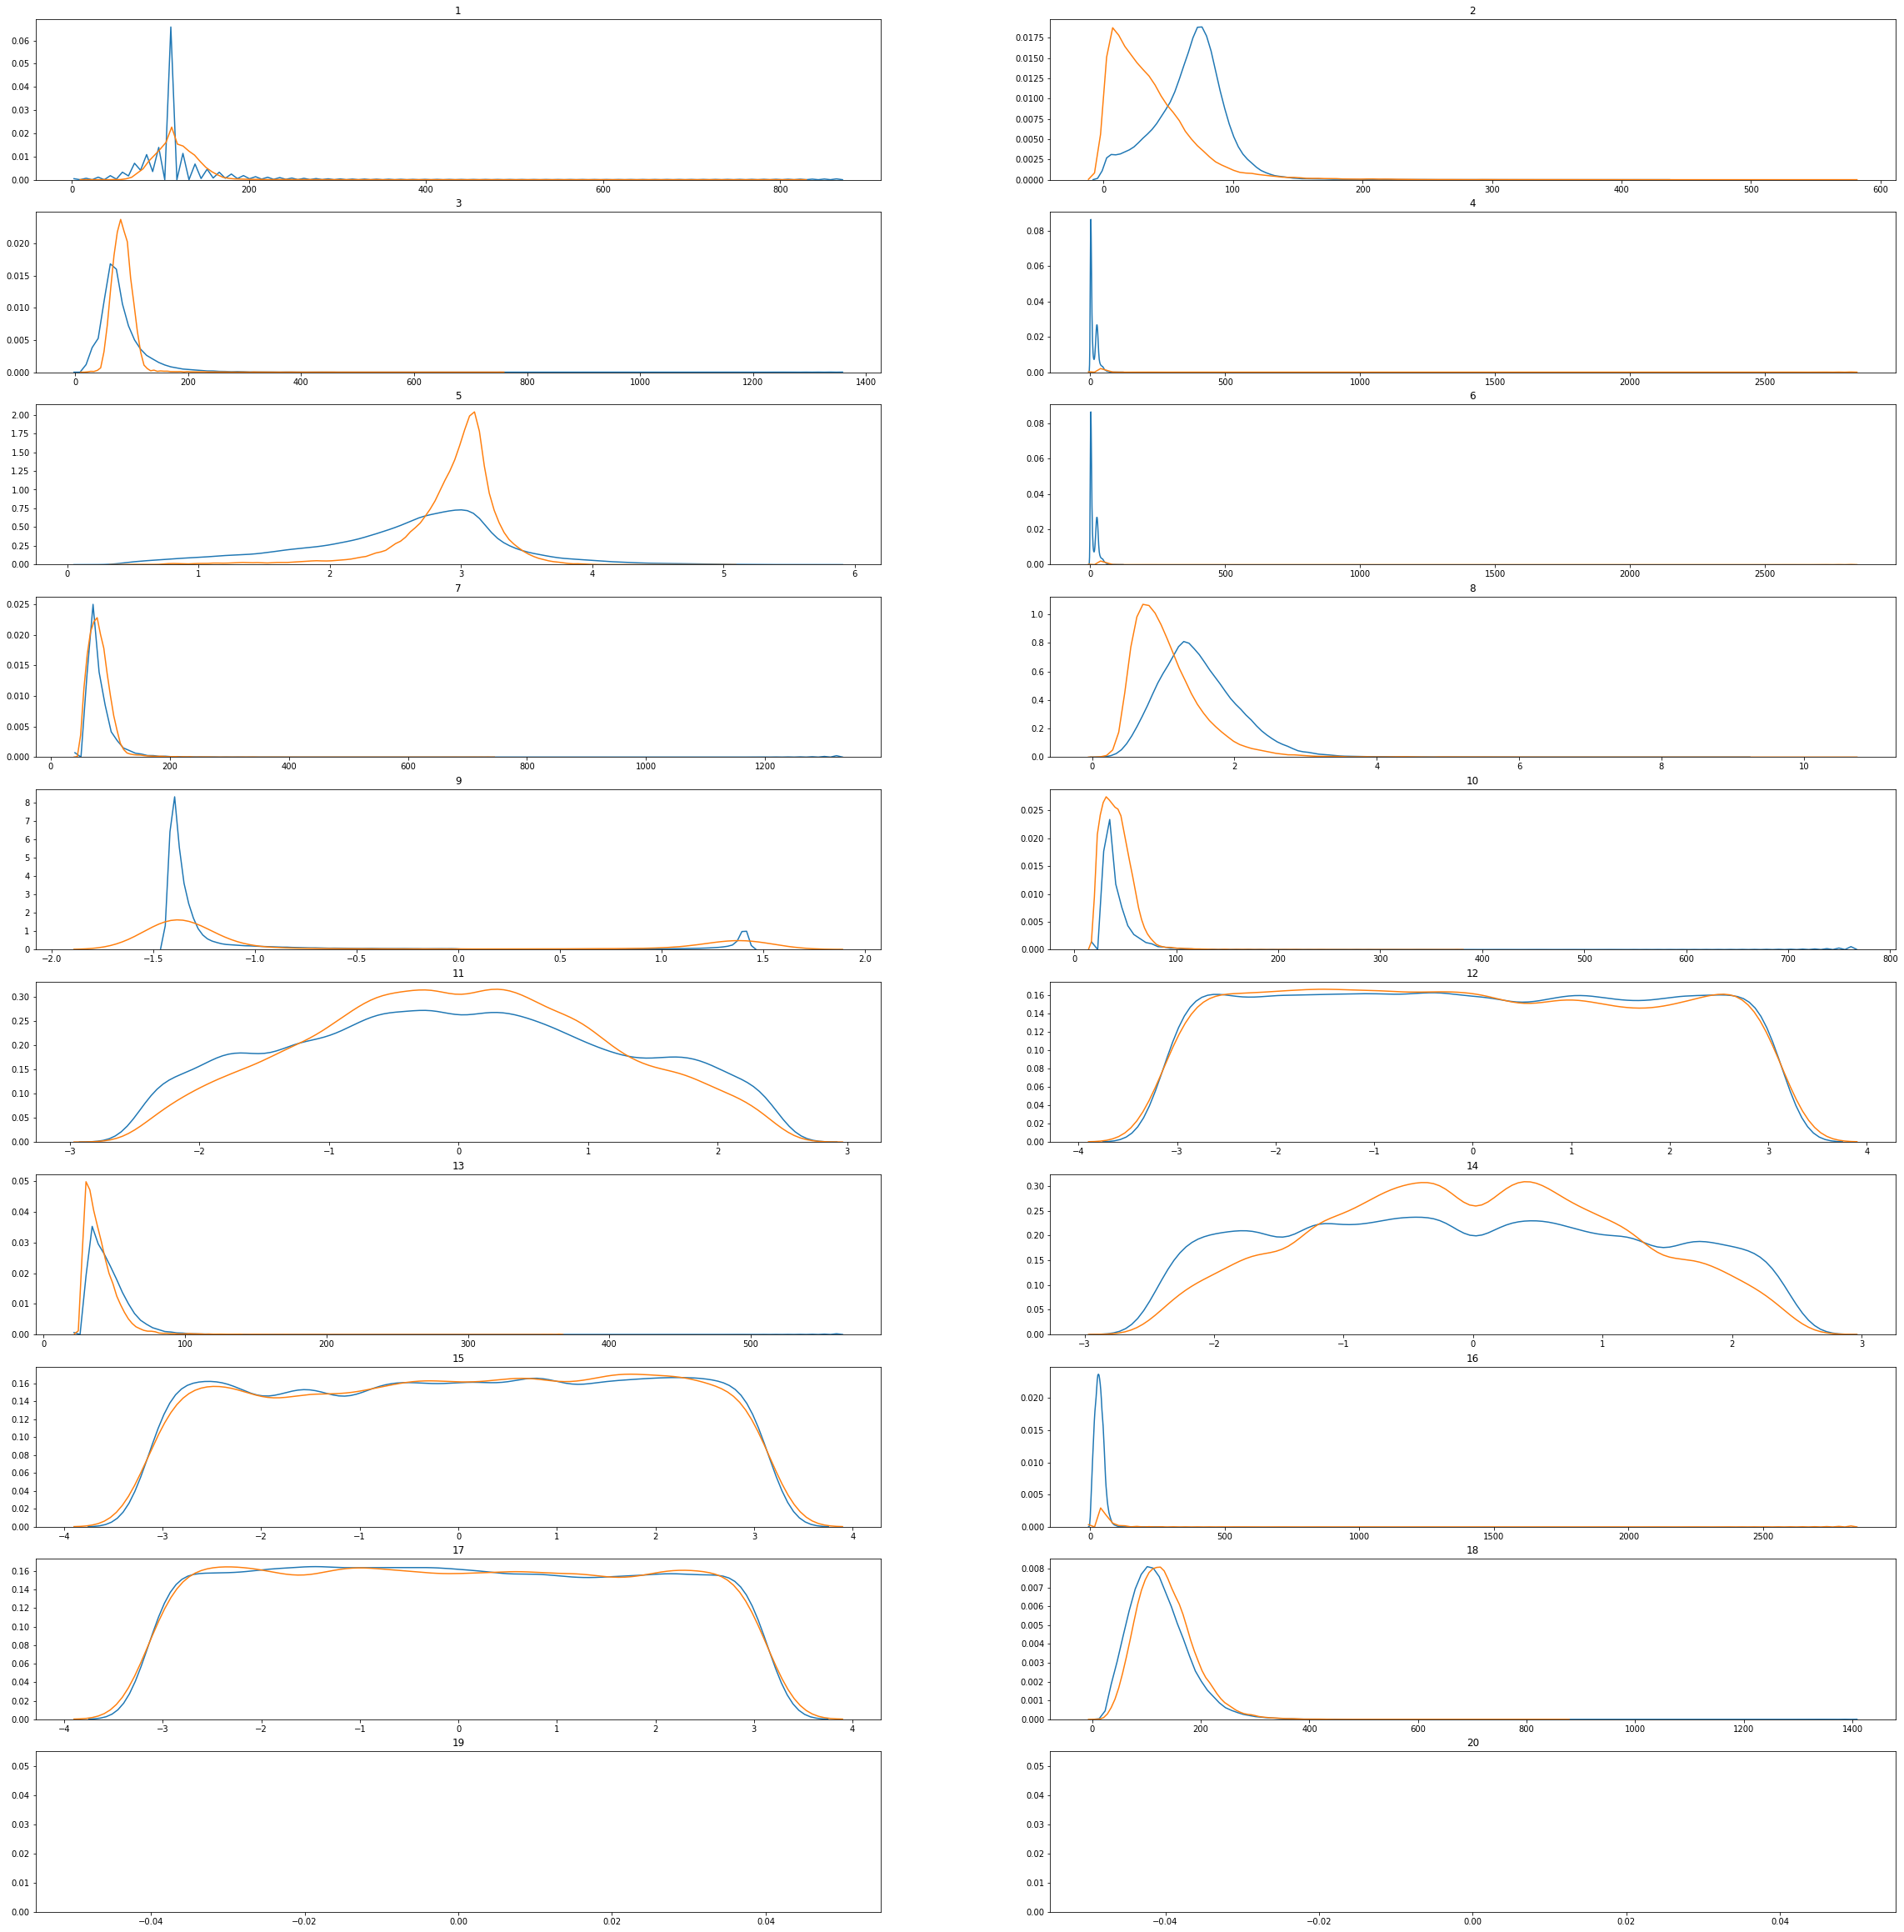

In [18]:
fig=plt.figure(figsize=(40,80))
for i in range(1,tX0_label0.shape[1]):
    plt.subplot(19,2,i)
    plt.title(i)
    sns.distplot(tX0_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX0_label1[:,i],ax=plt.gca(),hist=False)

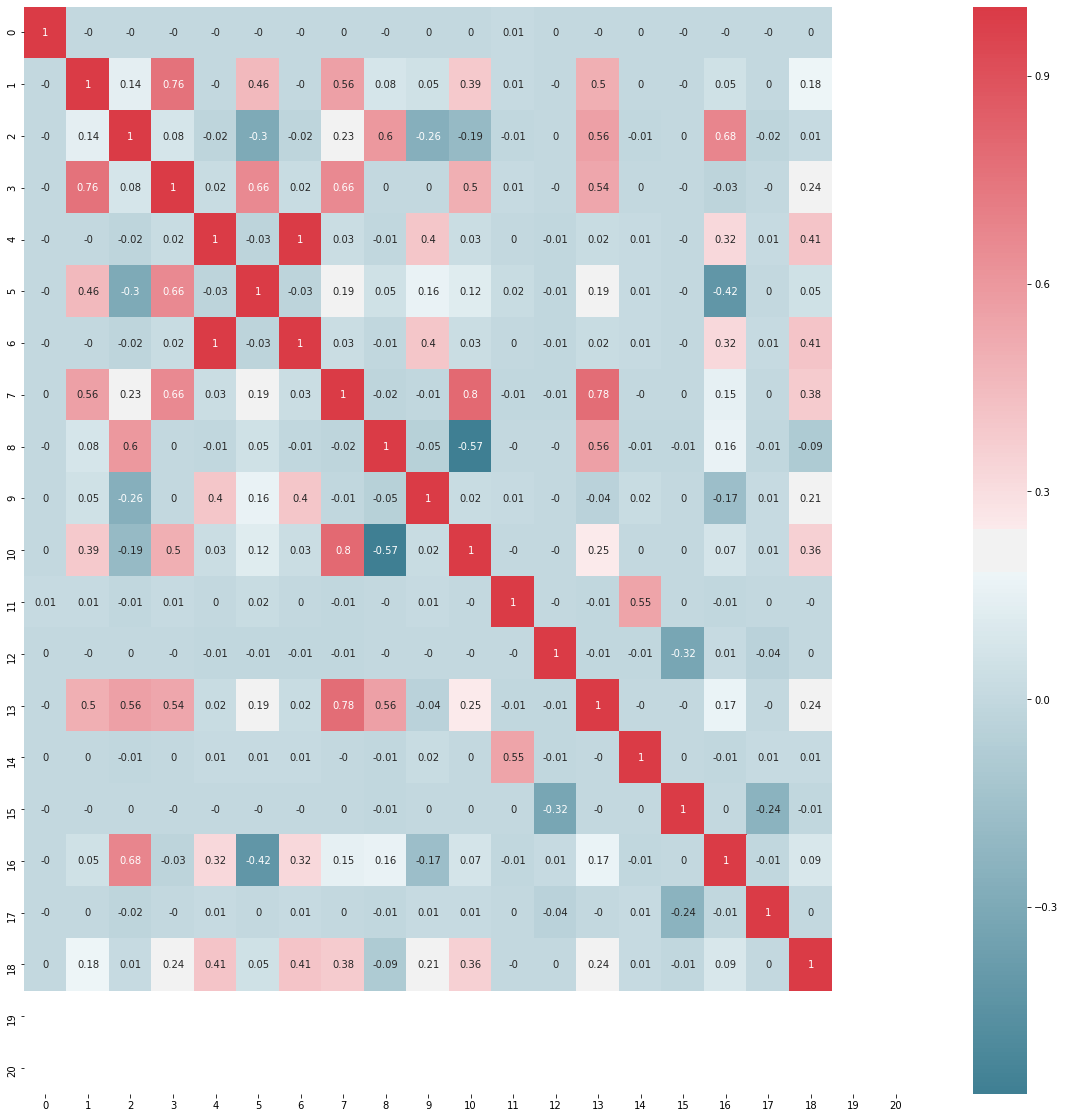

In [19]:
data=pd.DataFrame(tX0_dropped)
correlation_matrix=data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix.round(2),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

In [20]:
tX0_dropped_distribution=np.delete(tX0_dropped,[3,4,7,13,19,20],axis=1)

In [21]:
#??Do we need this?
np.random.seed(1)
np.random.shuffle(tX0_dropped_distribution)

In [22]:
index_to_be_skewed0=[2,7,14]

# Tx1 analysis

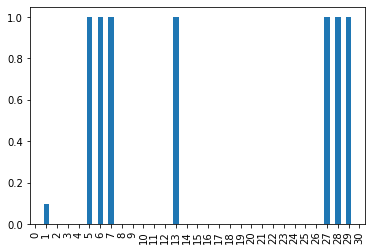

In [23]:
df=pd.DataFrame(tX1)
missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [24]:
tX1_dropped=np.delete(tX1,[5,6,7,13,27,28,29],axis=1)

In [25]:
tX1_dropped[:,1:2], median1=nan_to_median(tX1_dropped[:,1:2])

In [26]:
labels_dropped1=y[tX1_dropped[:,0].astype(int)]
tX1_label0=tX1_dropped[labels_dropped1==-1]
tX1_label1=tX1_dropped[labels_dropped1==1]
print(len(tX1_label0))
print(len(tX1_label1))

49834
27710


In [27]:
#np.random.seed(1)
#np.random.shuffle(tX1_label0)
#np.random.shuffle(tX1_label1)
#tX1_label0=tX1_label0[:len(tX1_label1)]
#tX1_dropped=np.concatenate((tX1_label0,tX1_label1),axis=0)
#np.random.shuffle(tX1_dropped)
print(len(tX1_label0))
print(len(tX1_label1))

49834
27710


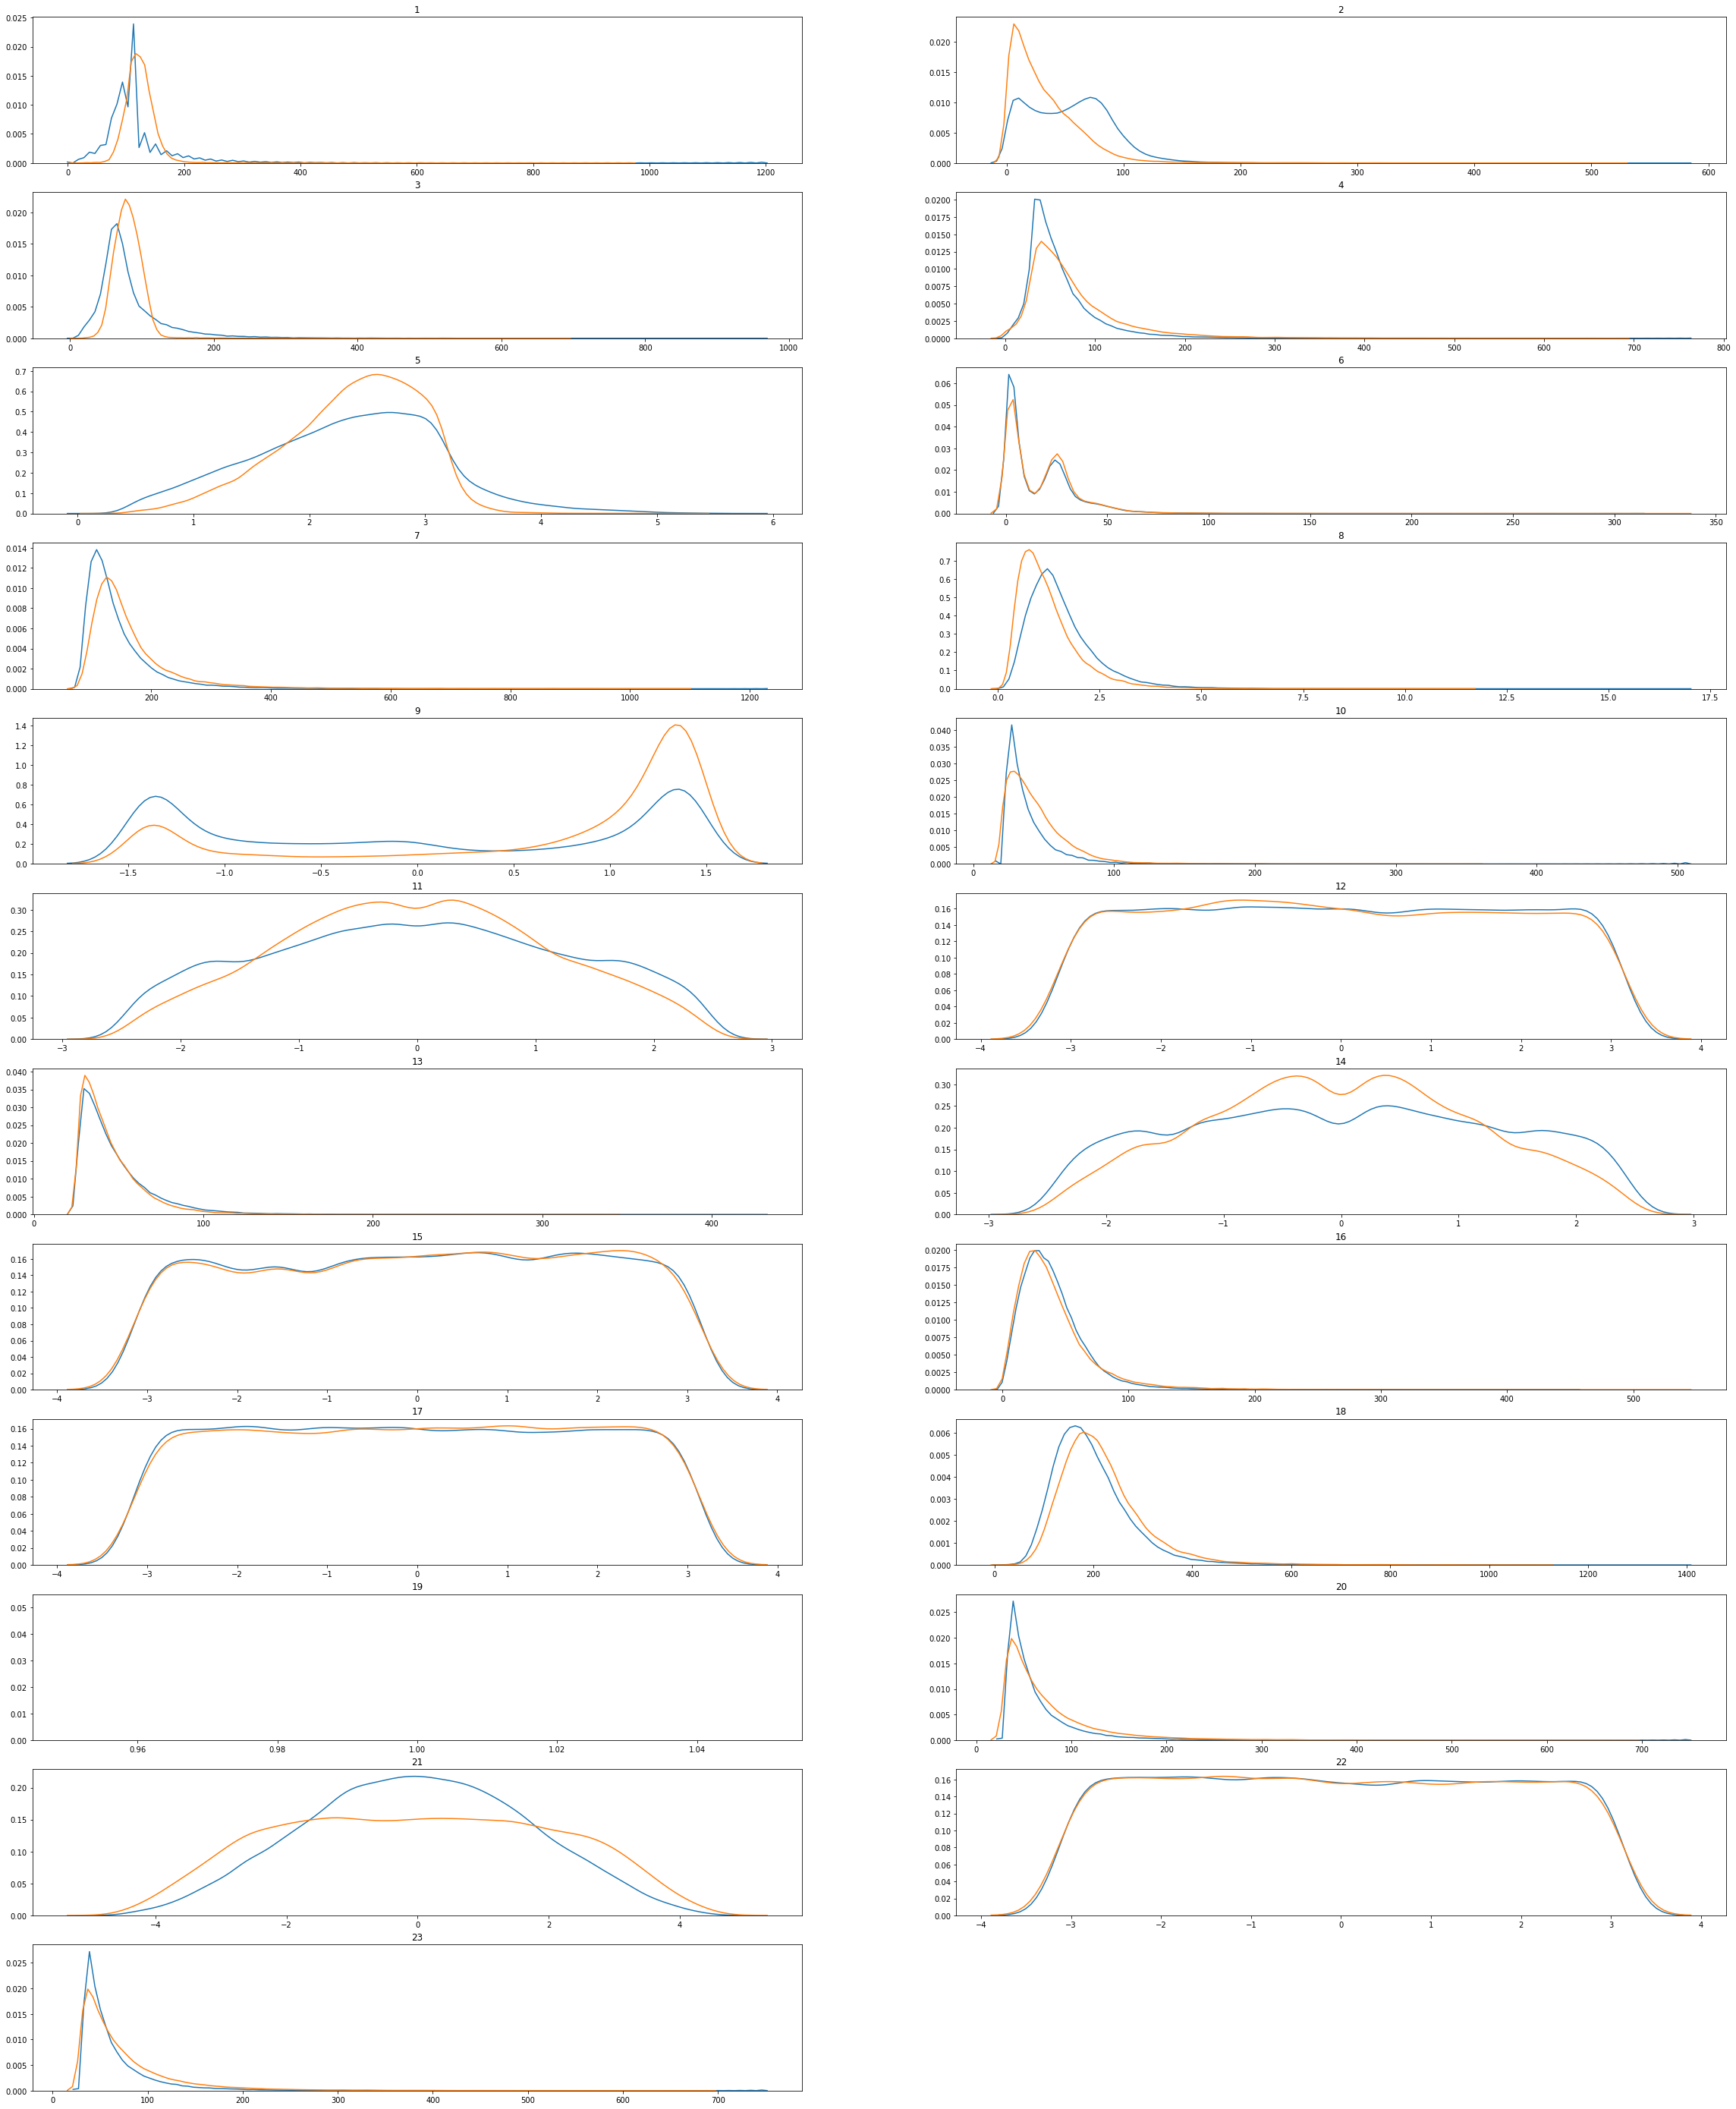

In [28]:
labels_dropped1=y[tX1_dropped[:,0].astype(int)]
tX1_label0=tX1_dropped[labels_dropped1==-1]
tX1_label1=tX1_dropped[labels_dropped1==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX1_label0.shape[1]):
    plt.subplot(19,2,i)
    plt.title(i)
    sns.distplot(tX1_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX1_label1[:,i],ax=plt.gca(),hist=False)

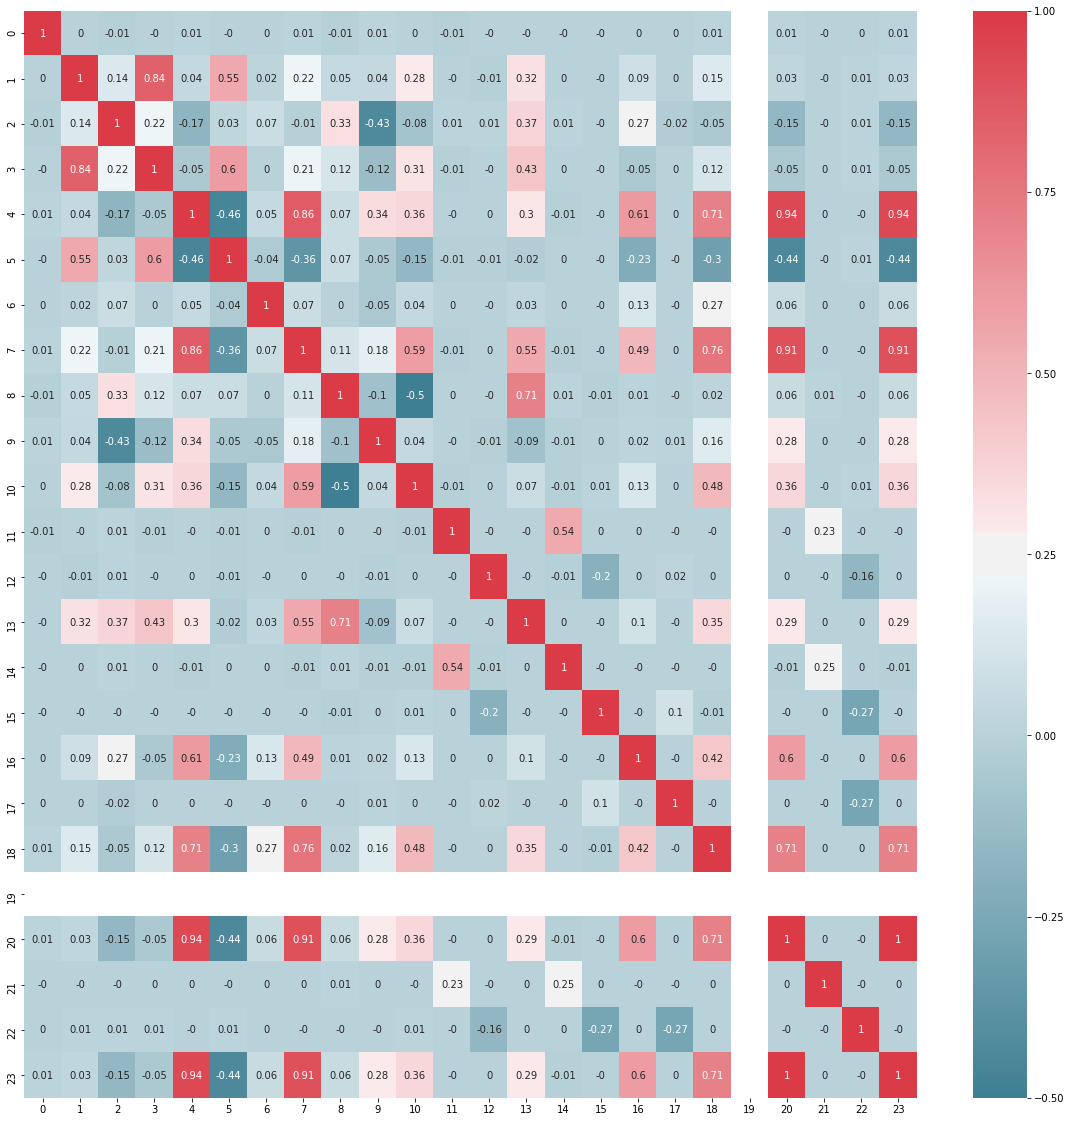

In [29]:
data=pd.DataFrame(tX1_dropped)
correlation_matrix=data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix.round(2),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

In [30]:
tX1_dropped_distribution=np.delete(tX1_dropped,[4,7,19,20],axis=1)

In [31]:
# data=pd.DataFrame(tX1_dropped_distribution)
# correlation_matrix=data.corr(method='pearson')
# plt.figure(figsize=(20,20))
# sns.heatmap(data=correlation_matrix.round(2),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

In [32]:
np.random.seed(1)
np.random.shuffle(tX1_dropped_distribution)

In [33]:
# min1=np.min(tX1_dropped_distribution[:,1:],axis=0)
# max1=np.max(tX1_dropped_distribution[:,1:],axis=0)
# tX1_dropped_distribution[:,1:]=min_max_transform(tX1_dropped_distribution[:,1:],min1,max1)

In [34]:
index_to_be_skewed1=[2,4,8,11]

In [35]:


# tX1_skew_mins=np.apply_along_axis(np.min,0,tX1_dropped_distribution)
# tX1_dropped_distribution[:,index_to_be_skewed1]= tX1_dropped_distribution[:,index_to_be_skewed1]+np.abs(tX1_skew_mins[index_to_be_skewed1])
# tX1_dropped_distribution[:,index_to_be_skewed1]= np.log(tX1_dropped_distribution[:,index_to_be_skewed1]+1)

In [36]:
# labels_dropped1=y[tX1_dropped_distribution[:,0].astype(int)]
# tX1_label0=tX1_dropped_distribution[labels_dropped1==-1]
# tX1_label1=tX1_dropped_distribution[labels_dropped1==1]

# fig1=plt.figure(figsize=(40,80))
# for i in range(1,tX1_label0.shape[1]):
#     plt.subplot(11,2,i)
#     plt.title(i)
#     sns.distplot(tX1_label0[:,i],ax=plt.gca(),hist=False)
#     sns.distplot(tX1_label1[:,i],ax=plt.gca(),hist=False)

# Tx2 analysis

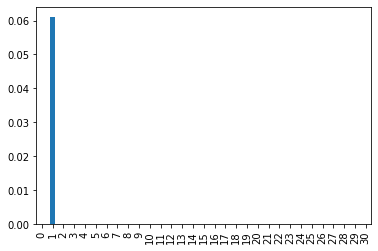

In [37]:
df=pd.DataFrame(tX2)
missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [38]:
tX2[:,1:2], median2=nan_to_median(tX2[:,1:2])

In [39]:
labels_dropped0=y[tX2[:,0].astype(int)]
tX2_label0=tX2[labels_dropped0==-1]
tX2_label1=tX2[labels_dropped0==1]
print(len(tX2_label0))
print(len(tX2_label1))

40078
32465


In [40]:
#np.random.seed(1)
#np.random.shuffle(tX2_label0)
#np.random.shuffle(tX2_label1)
#tX2_label1=tX2_label1[:len(tX2_label0)]
#tX2_dropped=np.concatenate((tX2_label0,tX2_label1),axis=0)
#np.random.shuffle(tX2_dropped)
print(len(tX2_label0))
print(len(tX2_label1))

40078
32465


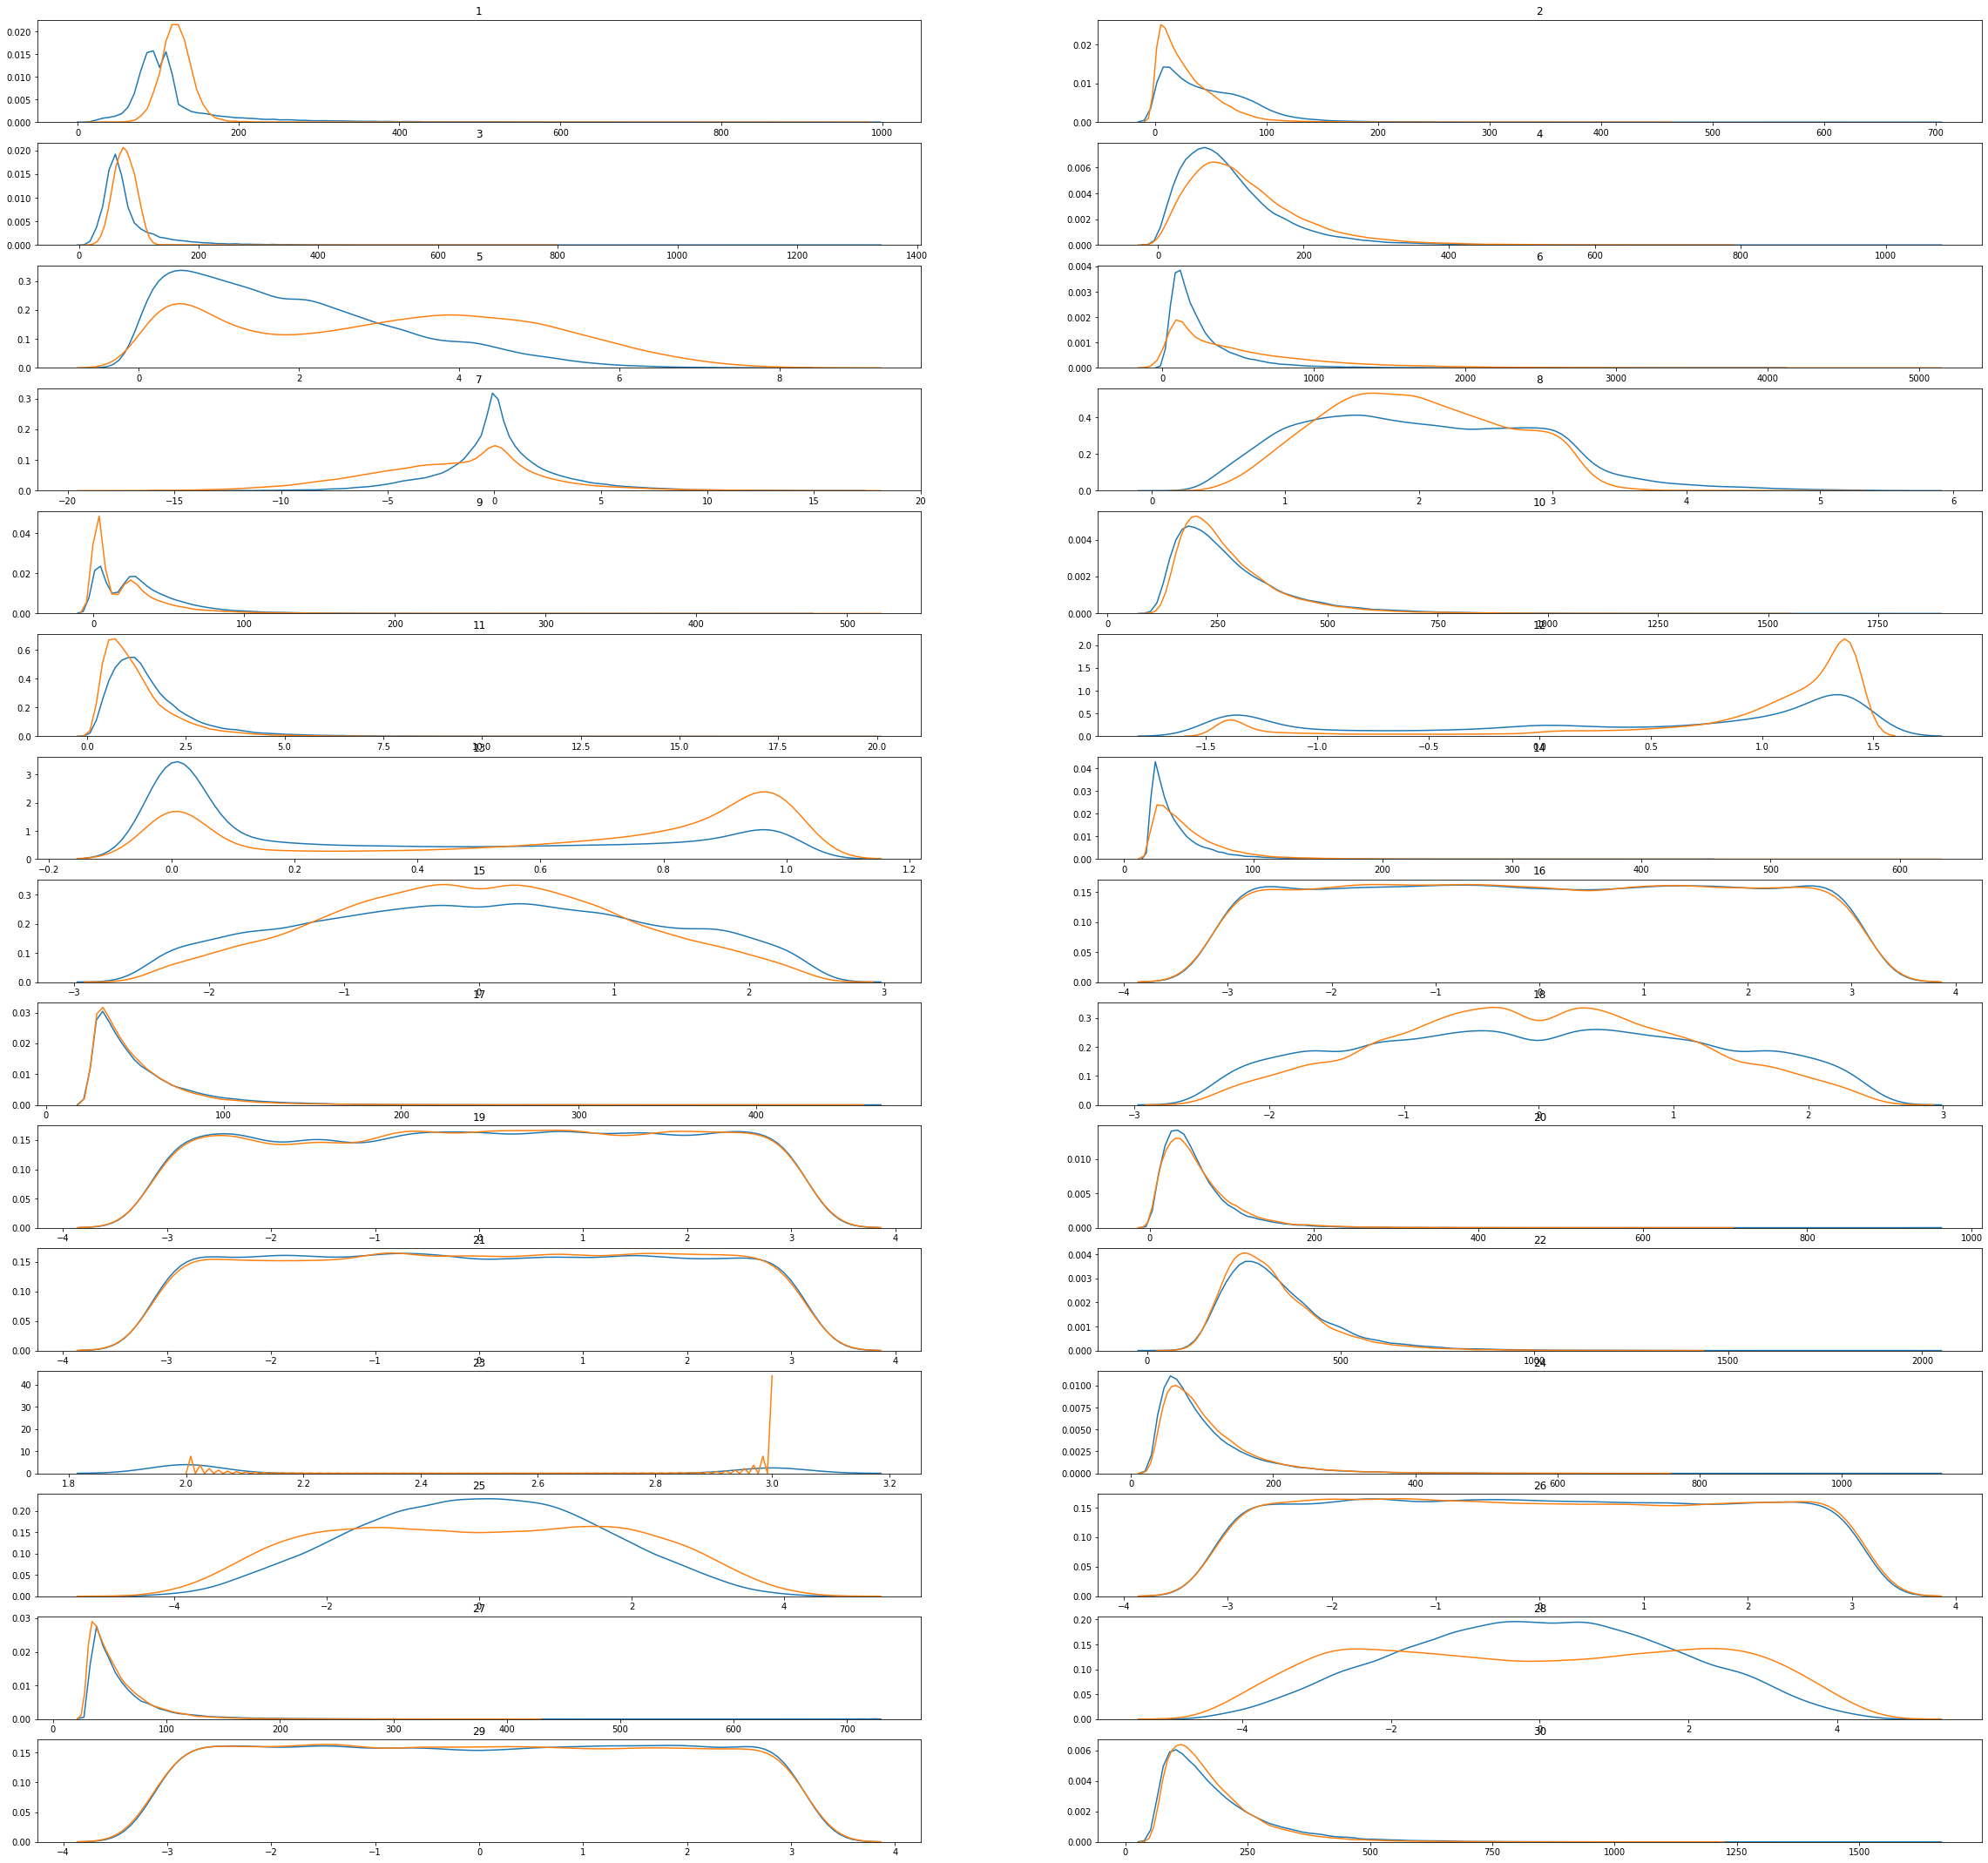

In [41]:
labels_dropped2=y[tX2[:,0].astype(int)]
tX2_label0=tX2[labels_dropped2==-1]
tX2_label1=tX2[labels_dropped2==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX2_label0.shape[1]):
    plt.subplot(31,2,i)
    plt.title(i)
    sns.distplot(tX2_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX2_label1[:,i],ax=plt.gca(),hist=False)

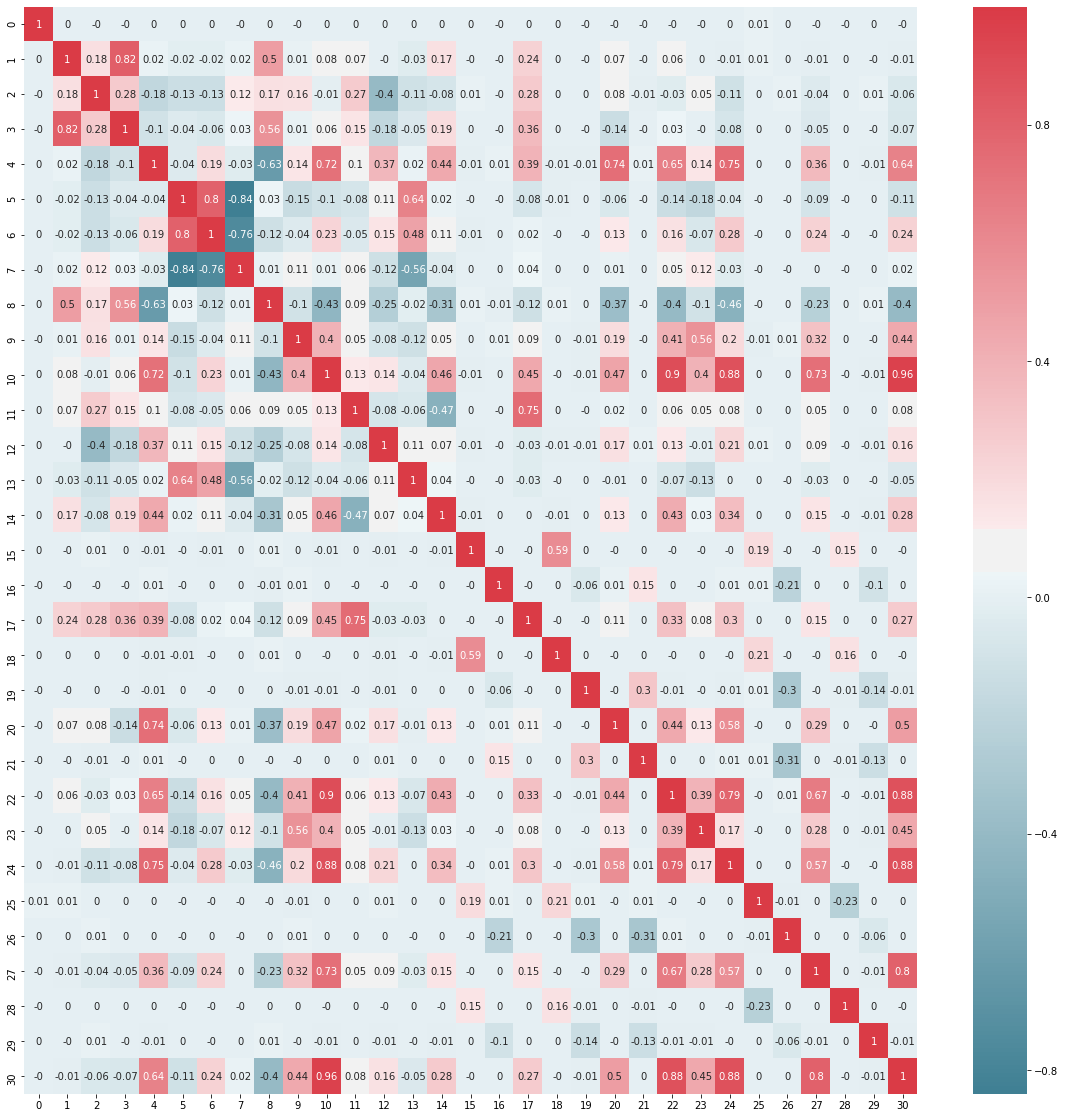

In [42]:
data=pd.DataFrame(tX2)
correlation_matrix=data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix.round(2),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

In [43]:
tX2_dropped_distribution=np.delete(tX2,[4,6,22,23,24,27,30],axis=1)

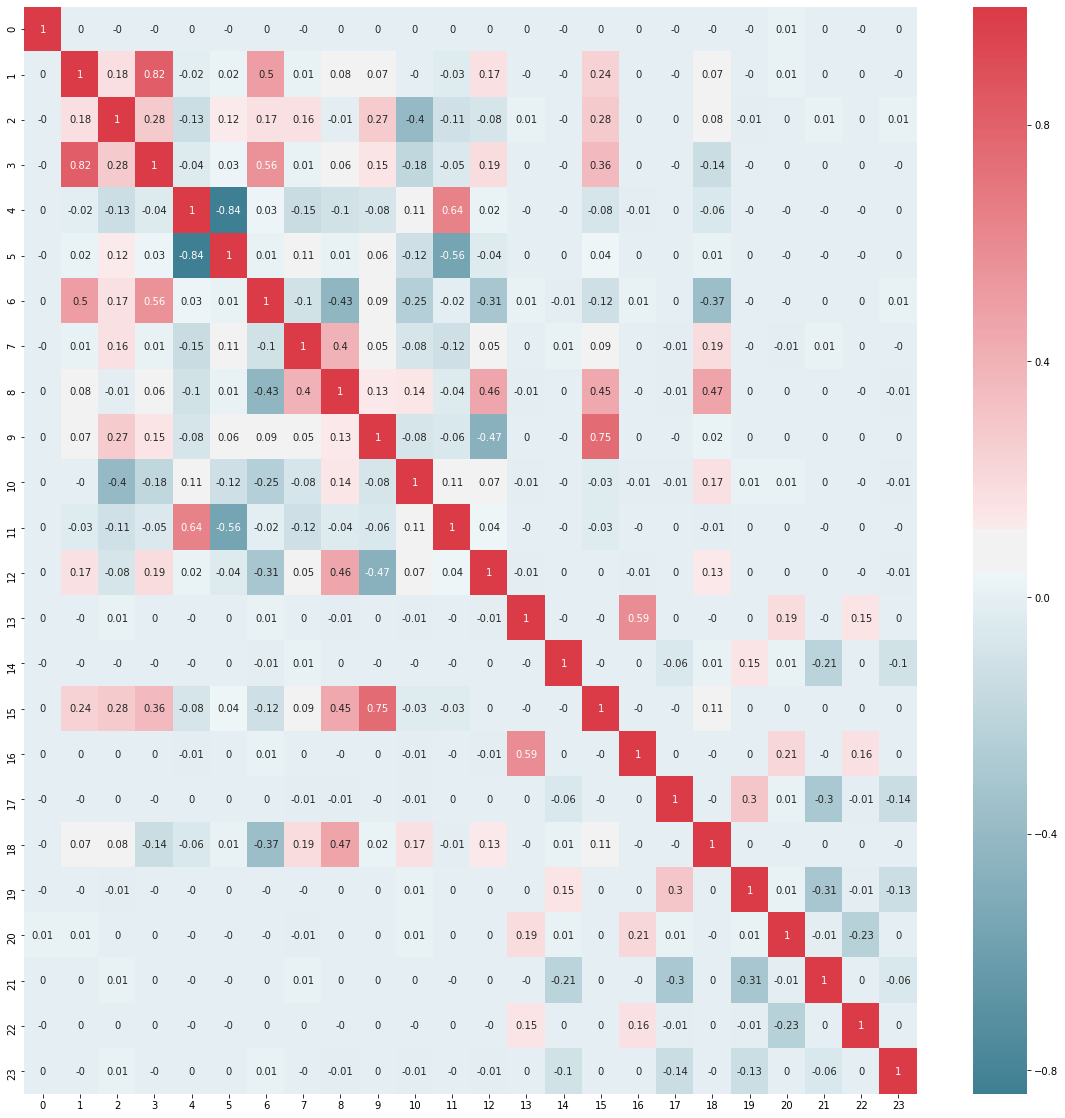

In [44]:
data=pd.DataFrame(tX2_dropped_distribution)
correlation_matrix=data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix.round(2),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

In [45]:
np.random.seed(1)
np.random.shuffle(tX2_dropped_distribution)

In [46]:
index_to_be_skewed2=[2,8,9,12,15,18]

# Useful functions

In [47]:
def expand_and_normalize_X(X,d):
    """
    perform degree-d polynomial feature expansion of X, with bias but omitting interaction terms
    and normalize them.
    """

    expand = build_poly(X,d)
    expand_withoutBias,mu,std = normalize(expand[:,1:])
    expand[:,1:] = expand_withoutBias
    return expand, mu, std

In [48]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [49]:
def accuracy(y_true, y_pred):
    return np.sum(y_pred==y_true) / len(y_true)

In [50]:
### the skew Indexes
index_to_be_skewed0=(index_to_be_skewed0-np.ones(len(index_to_be_skewed0))).astype(int)
index_to_be_skewed1=(index_to_be_skewed1-np.ones(len(index_to_be_skewed1))).astype(int)
index_to_be_skewed2=(index_to_be_skewed2-np.ones(len(index_to_be_skewed2))).astype(int)

# Least Squares

In [68]:
def cross_validation(y, x, k_indices,k, degree,index_to_be_skewed):
    """return the loss of ridge regression."""

    x_train = x[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    y_train= y[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    
    x_test=x[k_indices[k]]
    y_test=y[k_indices[k]]
    
    min_tr=np.min(x_train,axis=0)
    max_tr=np.max(x_train,axis=0)
    
    ##Do all this transformation BEFORE expansion?? (both tr and te)
    #Transformations to train
    x_train=min_max_transform(x_train,min_tr,max_tr)

    x_train[:,index_to_be_skewed]= np.log(x_train[:,index_to_be_skewed]+1)
    x_train_poly,mean_train,std_train= expand_and_normalize_X(x_train,degree)
    
    #transformations to test
    x_test= min_max_transform(x_test,min_tr,max_tr)
    x_test[:,index_to_be_skewed]= x_test[:,index_to_be_skewed] #+np.abs(tr_skew_mins[index_to_be_skewed])#use same tr_skew_mins as before
    x_test[:,index_to_be_skewed]= np.log(x_test[:,index_to_be_skewed]+1)
    x_test_poly=build_poly(x_test,degree)
    x_test_poly[:,1:]=(x_test_poly[:,1:]-mean_train)/std_train
    
    
    w,loss=m.least_squares(y_train, x_train_poly)

    loss_tr= -accuracy(y_train, predict_labels(w,x_train_poly))
    loss_te= -accuracy(y_test, predict_labels(w,x_test_poly))
    return loss_tr, loss_te,min_tr,max_tr



In [69]:
from plots import cross_validation_visualization

def cross_validation_demo(y, x,min_,max_,index_to_be_skewed):
    seed = 1
    k_fold = 5
    degrees = np.arange(min_,max_)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    mse_tr = []
    mse_te = []
    min_loss=np.inf
    min_degree=0
    # ***************************************************
    for degree_ in degrees:
        print(degree_)
        loss_tr_degree=np.array([])
        loss_te_degree=np.array([])

        for k in range(k_fold):
            loss_tr_k, loss_te_k,min_tr_k,max_tr_k=cross_validation(y, x, k_indices, k, degree_,index_to_be_skewed)
            loss_tr_degree= np.append(loss_tr_degree,loss_tr_k)
            loss_te_degree= np.append(loss_te_degree,loss_te_k)
        
        mse_tr.append(np.median(loss_tr_degree))
        mse_te.append(np.median(loss_te_degree))
        if(loss_te_degree.mean()<min_loss):
            min_loss=loss_te_degree.mean()
            min_degree=degree_
            
    # ***************************************************    
    cross_validation_visualization(degrees, mse_tr, mse_te)   #wrong xlabel should be degree
    return min_degree,min_loss

1
2
3
4
5
6
7
8
9
10
11
12
13
14


(11, -0.8433590231208088, 0.22820063700619994)

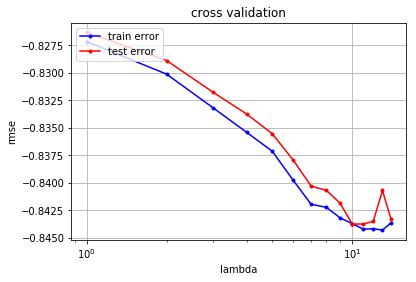

In [71]:
min_degree0,min_loss0=cross_validation_demo(y[tX0_dropped_distribution[:,0].astype(int)], tX0_dropped_distribution[:,1:],1,15,index_to_be_skewed0)

min0= np.min(tX0_dropped_distribution[:,1:],axis=0)
max0=np.max(tX0_dropped_distribution[:,1:],axis=0)
tx0=min_max_transform(tX0_dropped_distribution[:,1:],min0,max0)
tx0[:,index_to_be_skewed0]= np.log(tx0[:,index_to_be_skewed0]+1)
tx0_norm,mean0,std0=expand_and_normalize_X(tx0,min_degree0)


w0,loss0=m.least_squares(y[tX0_dropped_distribution[:,0].astype(int)],tx0_norm)
min_degree0,min_loss0,loss0

In [72]:
accuracy(y[tX0_dropped_distribution[:,0].astype(int)],predict_labels(w0,tx0_norm))

0.8441644230480518

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


(12, -0.8112458086149085, 0.2825643437769394)

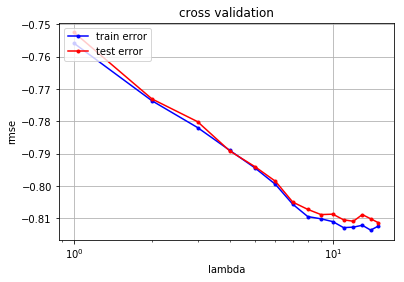

In [73]:
min_degree1,min_loss1=cross_validation_demo(y[tX1_dropped_distribution[:,0].astype(int)], tX1_dropped_distribution[:,1:],1,16,index_to_be_skewed1)

min1= np.min(tX1_dropped_distribution[:,1:],axis=0)
max1=np.max(tX1_dropped_distribution[:,1:],axis=0)
tx1=min_max_transform(tX1_dropped_distribution[:,1:],min1,max1)
tx1[:,index_to_be_skewed1]= np.log(tx1[:,index_to_be_skewed1]+1)
tx1_norm,mean1,std1=expand_and_normalize_X(tx1,min_degree1)

w1,loss1=m.least_squares(y[tX1_dropped_distribution[:,0].astype(int)],tx1_norm)
min_degree1,min_loss1,loss1

In [74]:
accuracy(y[tX1_dropped_distribution[:,0].astype(int)],predict_labels(w1,tx1_norm))

0.8108041885897039

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


(12, -0.8358422939068101, 0.24960294587864926)

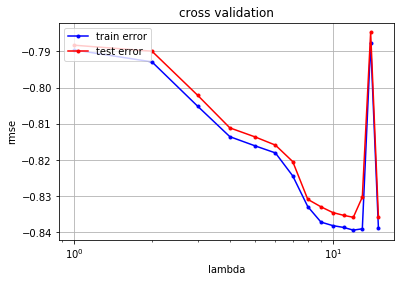

In [75]:
min_degree2,min_loss2=cross_validation_demo(y[tX2_dropped_distribution[:,0].astype(int)], tX2_dropped_distribution[:,1:],1,16,index_to_be_skewed2)

min2= np.min(tX2_dropped_distribution[:,1:],axis=0)
max2=np.max(tX2_dropped_distribution[:,1:],axis=0)
tx2=min_max_transform(tX2_dropped_distribution[:,1:],min2,max2)
tx2[:,index_to_be_skewed2]= np.log(tx2[:,index_to_be_skewed2]+1)
tx2_norm,mean2,std2=expand_and_normalize_X(tx2,min_degree2)

w2,loss2=m.least_squares(y[tX2_dropped_distribution[:,0].astype(int)],tx2_norm)
min_degree2,min_loss2,loss2

In [76]:
accuracy(y[tX2_dropped_distribution[:,0].astype(int)],predict_labels(w2,tx2_norm))

0.8401913347945357

In [77]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '../data/result_LS.csv' # TODO: fill in desired name of output file for submission


x0=[]
x1=[]
x2=[]
y0indices=[]
y1indices=[]
y2indices=[]

for index, jet_num in enumerate(tX_test[:,22]):   
    if(int(jet_num)==0):
        x0.append(tX_test[index])
        y0indices.append(index)
    if(int(jet_num)==1):
        x1.append(tX_test[index])
        y1indices.append(index)
    if(int(jet_num)==2 or int(jet_num)==3):
        x2.append(tX_test[index])
        y2indices.append(index)
        
x0=np.array(x0)
x1=np.array(x1)
x2=np.array(x2)

x0=np.delete(x0,[5,6,7,13,24,25,26,27,28,29]-np.ones(10),axis=1)
x0[:,0:1]=number_to_other_number(x0[:,0:1],median0)
###SHOULD WE DO nan_to_median here??
### Also, we take all the test set right(dont drop to have 50-50)?
x0=np.delete(x0,[3,4,7,13,19,20]-np.ones(6),axis=1)

x0=min_max_transform(x0,min0,max0)
#use previous skew_mins
x0[:,index_to_be_skewed0]= np.log(x0[:,index_to_be_skewed0]+1)

x1=np.delete(x1,[5,6,7,13,27,28,29]-np.ones(7),axis=1)
x1[:,0:1]=number_to_other_number(x1[:,0:1],median1)
x1=np.delete(x1,[4,7,19,20]-np.ones(4),axis=1)

x1=min_max_transform(x1,min1,max1)
#use previous skew_mins

x1[:,index_to_be_skewed1]= np.log(x1[:,index_to_be_skewed1]+1)


x2=np.delete(x2,[4,6,22,23,24,27,30]-np.ones(7),axis=1)
x2[:,0:1]=number_to_other_number(x2[:,0:1],median2)
x2=min_max_transform(x2,min2,max2)
#use previous skew_mins

x2[:,index_to_be_skewed2]= np.log(x2[:,index_to_be_skewed2]+1)


##??shouldn't we also use the mean/std of the best cross validation?
x0= build_poly(x0, min_degree0)
x0[:,1:]= (x0[:,1:]-mean0)/std0

x1= build_poly(x1, min_degree1)
x1[:,1:]= (x1[:,1:]-mean1)/std1

x2= build_poly(x2, min_degree2)
x2[:,1:]= (x2[:,1:]-mean2)/std2


y0Predict=predict_labels(w0,x0)
y1Predict=predict_labels(w1,x1)
y2Predict=predict_labels(w2,x2)

y_pred=np.empty(tX_test.shape[0])
y_pred[y0indices]=y0Predict
y_pred[y1indices]=y1Predict
y_pred[y2indices]=y2Predict

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

/home/walid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/walid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/walid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/walid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/walid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


# Ridge Regression

In [51]:
def cross_validation_ridge(y, x, k_indices,k, degree,index_to_be_skewed,lambda_):
    """return the loss of ridge regression."""

    x_train = x[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    y_train= y[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    
    x_test=x[k_indices[k]]
    y_test=y[k_indices[k]]
    
    min_tr=np.min(x_train,axis=0)
    max_tr=np.max(x_train,axis=0)
    
    ##Do all this transformation BEFORE expansion?? (both tr and te)
    #Transformations to train
    x_train=min_max_transform(x_train,min_tr,max_tr)

    x_train[:,index_to_be_skewed]= np.log(x_train[:,index_to_be_skewed]+1)
    x_train_poly,mean_train,std_train= expand_and_normalize_X(x_train,degree)
    
    #transformations to test
    x_test= min_max_transform(x_test,min_tr,max_tr)
    x_test[:,index_to_be_skewed]= x_test[:,index_to_be_skewed] #+np.abs(tr_skew_mins[index_to_be_skewed])#use same tr_skew_mins as before
    x_test[:,index_to_be_skewed]= np.log(x_test[:,index_to_be_skewed]+1)
    x_test_poly=build_poly(x_test,degree)
    x_test_poly[:,1:]=(x_test_poly[:,1:]-mean_train)/std_train
    
    
    w,loss=m.ridge_regression(y_train, x_train_poly,lambda_)

    loss_tr= -accuracy(y_train, predict_labels(w,x_train_poly))
    loss_te= -accuracy(y_test, predict_labels(w,x_test_poly))
    return loss_tr, loss_te

In [52]:
from plots import cross_validation_visualization
from build_polynomial import build_poly

def cross_validation_demo_ridge(y,x,min_,max_,index_to_be_skewed):
    seed = 1
    k_fold = 5
    lambdas = np.logspace(-15, 0, 30)
    degrees = np.arange(min_,max_)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    min_loss=np.inf
    min_lambda=-1
    min_degree=0
    fig=plt.figure(figsize=(40,80))
    # *****************
    for degree_ in degrees:
        print(degree_)
        # define lists to store the loss of training data and test data
        loss_tr = []
        loss_te = []
        for lambda_ in lambdas:
            loss_tr_tmp=[]
            loss_te_tmp=[]
            for k in range(k_fold):
                loss_tr_k, loss_te_k=cross_validation_ridge(y, x, k_indices, k, degree_, index_to_be_skewed, lambda_)
                loss_tr_tmp.append(loss_tr_k)
                loss_te_tmp.append(loss_te_k)   
            loss_tr_mean=np.sum(loss_tr_tmp)/len(loss_tr_tmp)
            loss_te_mean=np.sum(loss_te_tmp)/len(loss_te_tmp)
            loss_tr.append(loss_tr_mean)
            loss_te.append(loss_te_mean)
            if(loss_te_mean<min_loss):
                min_loss=loss_te_mean
                min_lambda=lambda_
                min_degree=degree_
        plt.subplot(degrees[-1],2,degree_)
        cross_validation_visualization(lambdas, loss_tr, loss_te)
        # *****************    
    return min_lambda,min_degree,min_loss

1
2
3
4
5
6
7
8
9
10
11
12
13
14


(14, -0.8432689420478431, 0.22786368969480275)

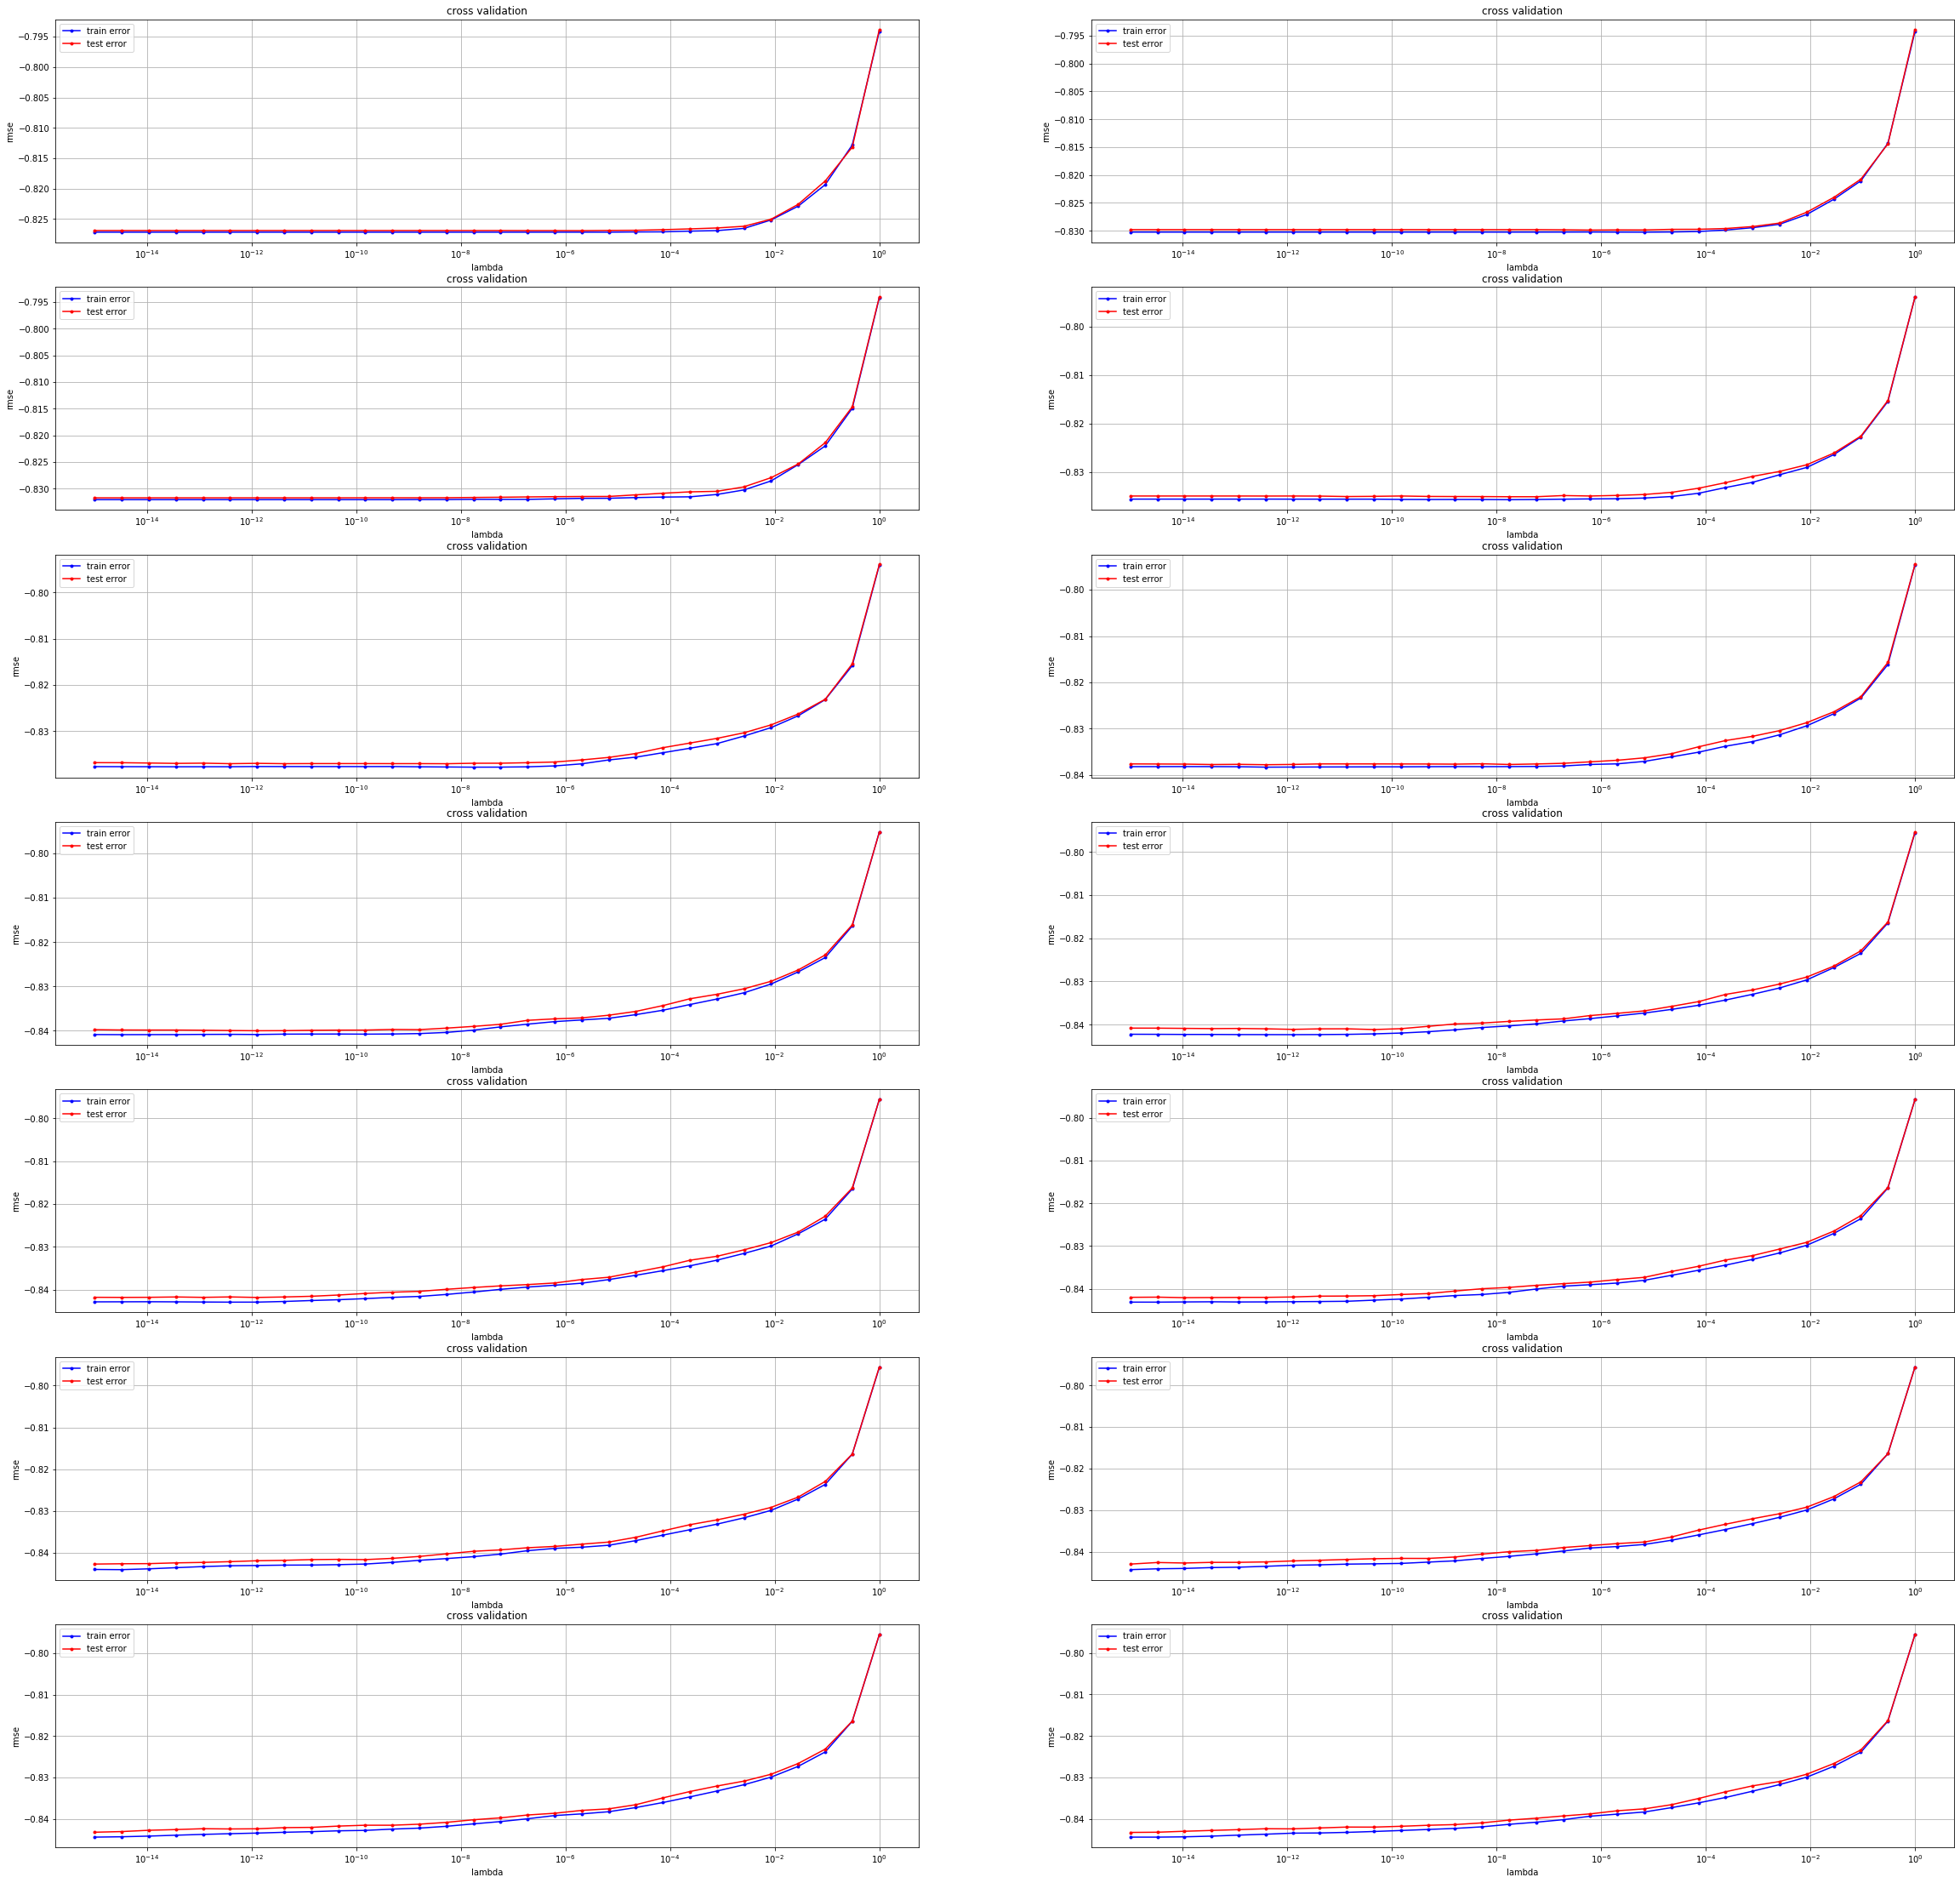

In [53]:
min_lambda0,min_degree0,min_loss0=cross_validation_demo_ridge(y[tX0_dropped_distribution[:,0].astype(int)], tX0_dropped_distribution[:,1:],1,15,index_to_be_skewed0)

min0= np.min(tX0_dropped_distribution[:,1:],axis=0)
max0=np.max(tX0_dropped_distribution[:,1:],axis=0)
tx0=min_max_transform(tX0_dropped_distribution[:,1:],min0,max0)
tx0[:,index_to_be_skewed0]= np.log(tx0[:,index_to_be_skewed0]+1)
tx0_norm,mean0,std0=expand_and_normalize_X(tx0,min_degree0)


w0,loss0=m.ridge_regression(y[tX0_dropped_distribution[:,0].astype(int)],tx0_norm,min_lambda0)
min_degree0,min_loss0,loss0

In [54]:
accuracy(y[tX0_dropped_distribution[:,0].astype(int)],predict_labels(w0,tx0_norm))

0.8441243882177495

1
2
3
4
5
6
7
8
9
10
11
12
13
14


(13, -0.8089889089502194, 0.2816210690402295)

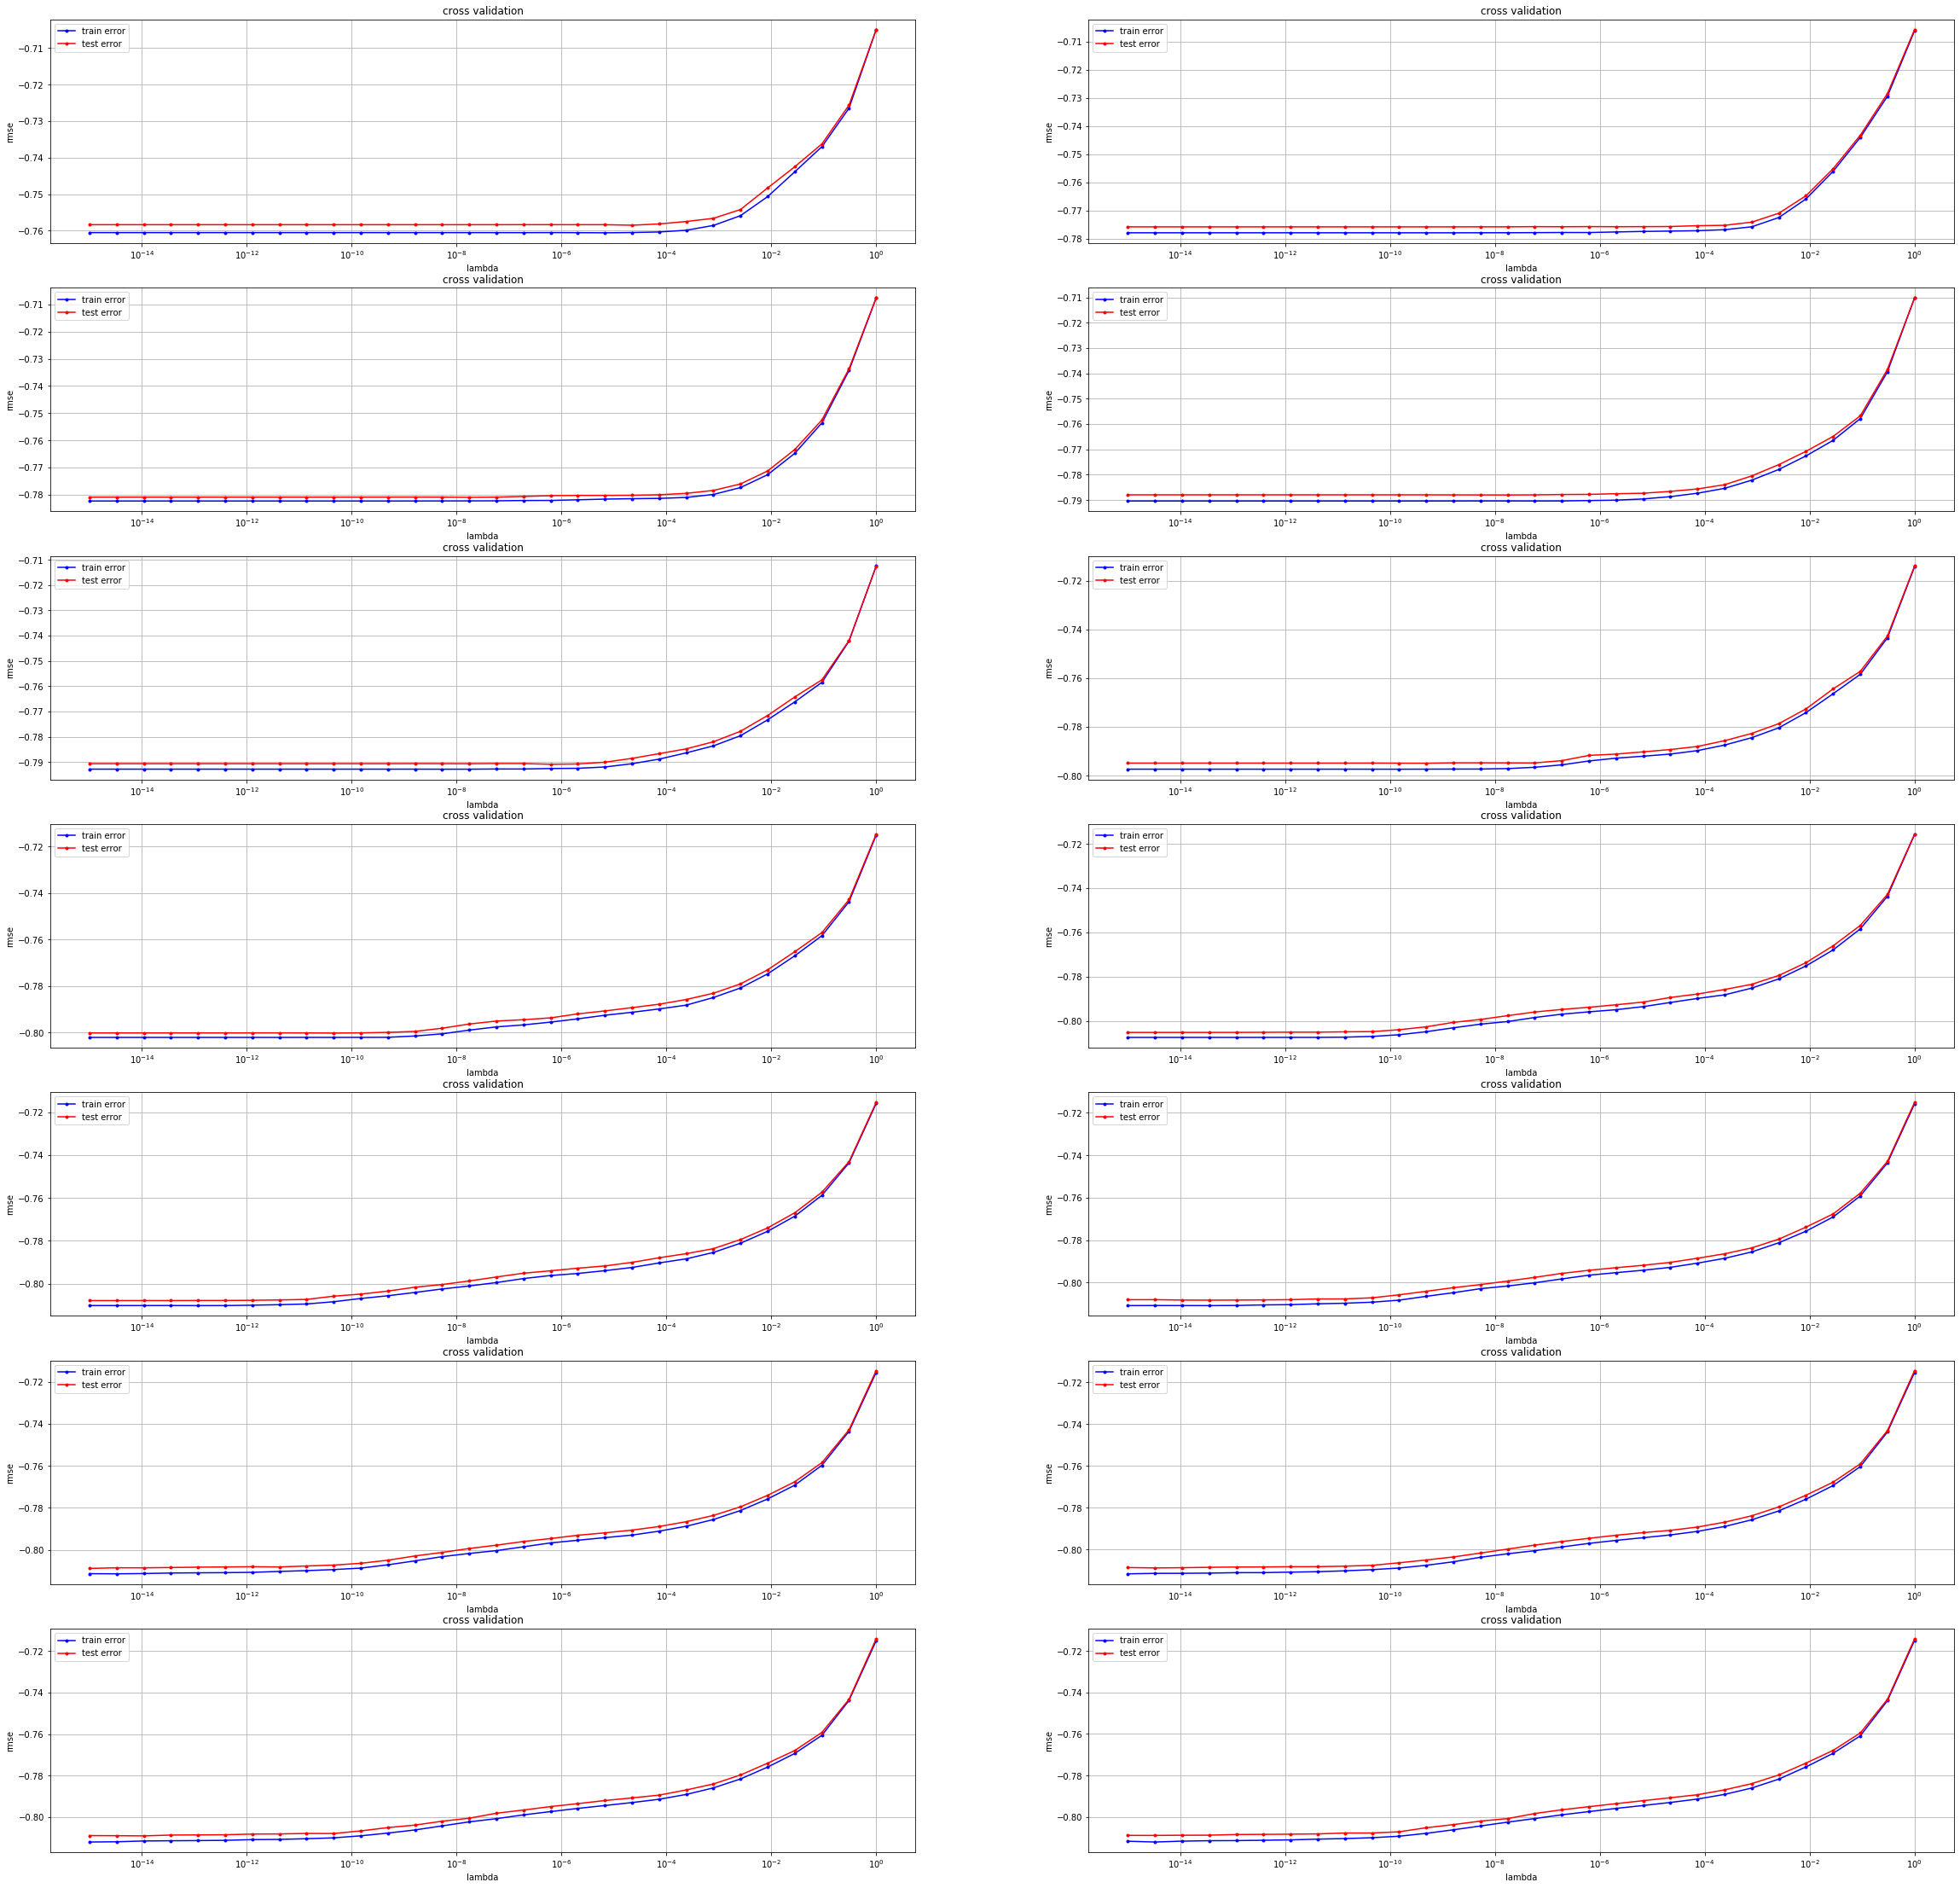

In [55]:
min_lambda1,min_degree1,min_loss1=cross_validation_demo_ridge(y[tX1_dropped_distribution[:,0].astype(int)], tX1_dropped_distribution[:,1:],1,15,index_to_be_skewed1)

min1= np.min(tX1_dropped_distribution[:,1:],axis=0)
max1=np.max(tX1_dropped_distribution[:,1:],axis=0)
tx1=min_max_transform(tX1_dropped_distribution[:,1:],min1,max1)
tx1[:,index_to_be_skewed1]= np.log(tx1[:,index_to_be_skewed1]+1)
tx1_norm,mean1,std1=expand_and_normalize_X(tx1,min_degree1)


w1,loss1=m.ridge_regression(y[tX1_dropped_distribution[:,0].astype(int)],tx1_norm,min_lambda1)
min_degree1,min_loss1,loss1

In [56]:
accuracy(y[tX1_dropped_distribution[:,0].astype(int)],predict_labels(w1,tx1_norm))

0.8110621066749201

1
2
3
4
5
6
7
8
9
10
11
12
13
14


(13, -0.8369451337193272, 0.2515625208266184)

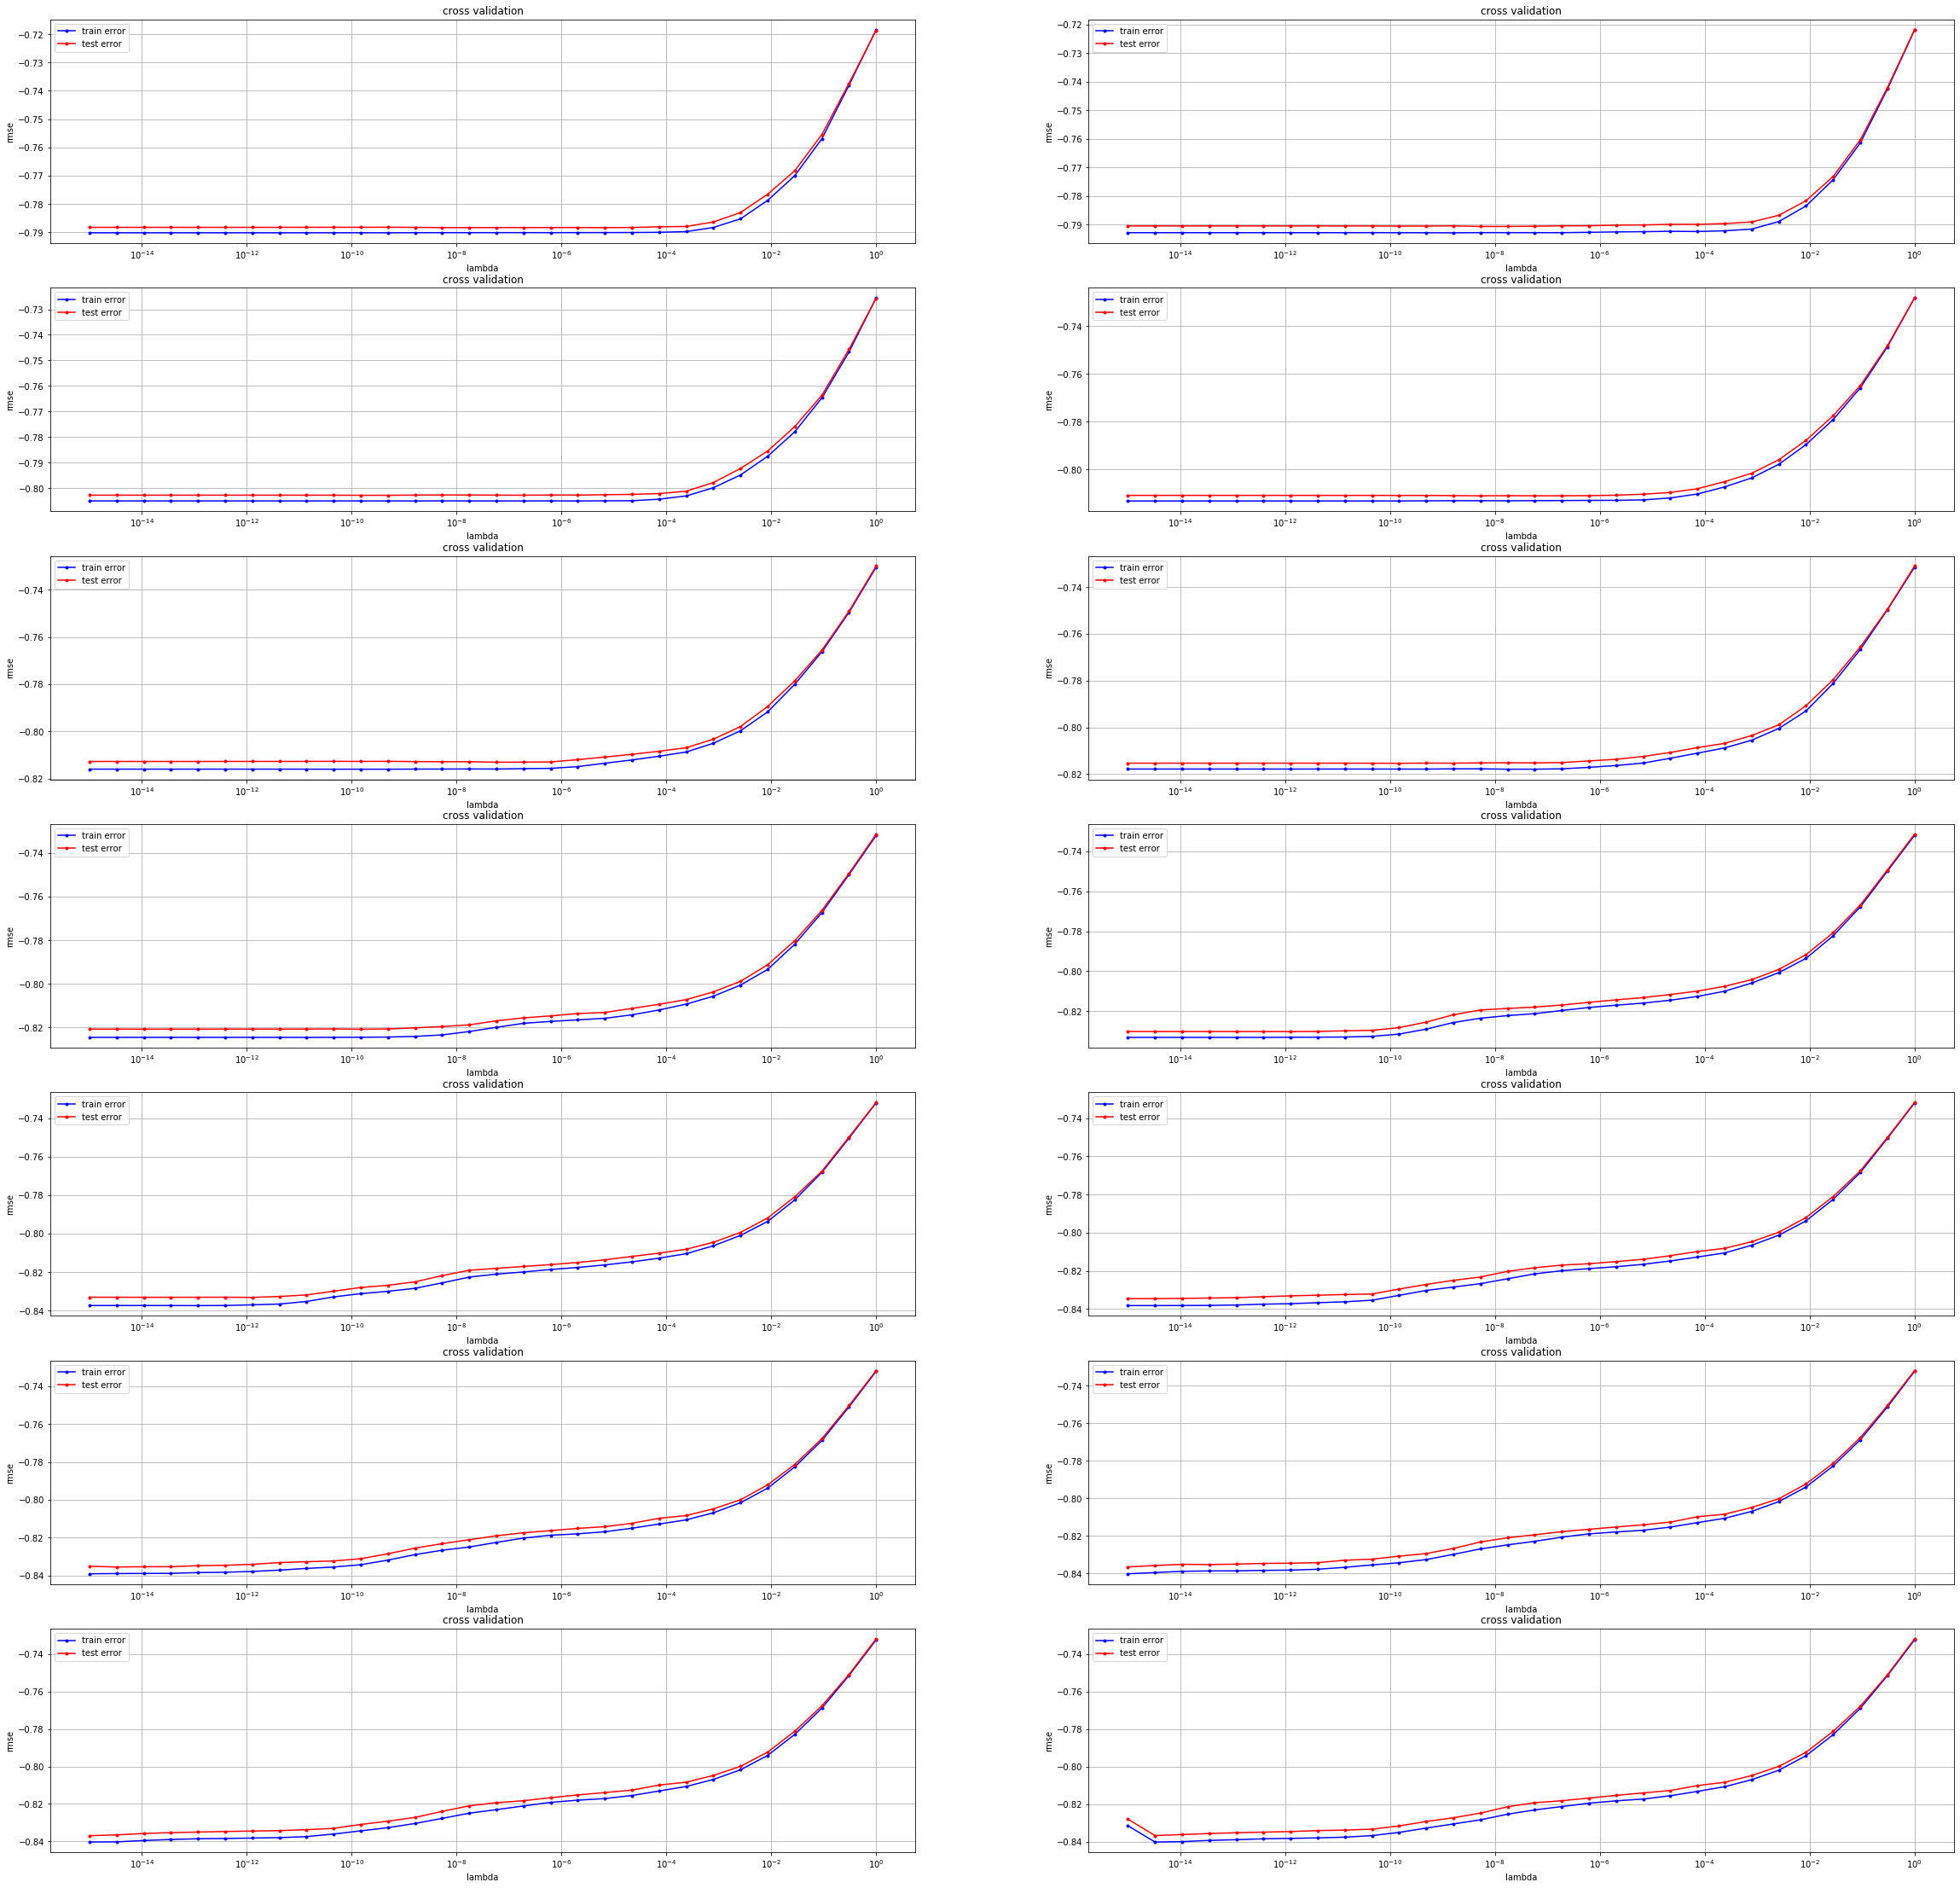

In [57]:
min_lambda2,min_degree2,min_loss2=cross_validation_demo_ridge(y[tX2_dropped_distribution[:,0].astype(int)], tX2_dropped_distribution[:,1:],1,15,index_to_be_skewed2)

min2= np.min(tX2_dropped_distribution[:,1:],axis=0)
max2=np.max(tX2_dropped_distribution[:,1:],axis=0)
tx2=min_max_transform(tX2_dropped_distribution[:,1:],min2,max2)
tx2[:,index_to_be_skewed2]= np.log(tx2[:,index_to_be_skewed2]+1)
tx2_norm,mean2,std2=expand_and_normalize_X(tx2,min_degree2)


w2,loss2=m.ridge_regression(y[tX2_dropped_distribution[:,0].astype(int)],tx2_norm,min_lambda2)
min_degree2,min_loss2,loss2

In [58]:
accuracy(y[tX2_dropped_distribution[:,0].astype(int)],predict_labels(w2,tx2_norm))

0.8392953145031223

In [61]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '/Users/gerald/Workspaces/Machine Leaning/data/result_ridgeUltimate2.csv' # TODO: fill in desired name of output file for submission


x0=[]
x1=[]
x2=[]
y0indices=[]
y1indices=[]
y2indices=[]

for index, jet_num in enumerate(tX_test[:,22]):   
    if(int(jet_num)==0):
        x0.append(tX_test[index])
        y0indices.append(index)
    if(int(jet_num)==1):
        x1.append(tX_test[index])
        y1indices.append(index)
    if(int(jet_num)==2 or int(jet_num)==3):
        x2.append(tX_test[index])
        y2indices.append(index)
        
x0=np.array(x0)
x1=np.array(x1)
x2=np.array(x2)

x0=np.delete(x0,[5,6,7,13,24,25,26,27,28,29]-np.ones(10),axis=1)
x0[:,0:1]=number_to_other_number(x0[:,0:1],median0)
###SHOULD WE DO nan_to_median here??
### Also, we take all the test set right(dont drop to have 50-50)?
x0=np.delete(x0,[3,4,7,13,19,20]-np.ones(6),axis=1)

x0=min_max_transform(x0,min0,max0)
#use previous skew_mins
x0[:,index_to_be_skewed0]= np.log(x0[:,index_to_be_skewed0]+1)

x1=np.delete(x1,[5,6,7,13,27,28,29]-np.ones(7),axis=1)
x1[:,0:1]=number_to_other_number(x1[:,0:1],median1)
x1=np.delete(x1,[4,7,19,20]-np.ones(4),axis=1)

x1=min_max_transform(x1,min1,max1)
#use previous skew_mins

x1[:,index_to_be_skewed1]= np.log(x1[:,index_to_be_skewed1]+1)


x2=np.delete(x2,[4,6,22,23,24,27,30]-np.ones(7),axis=1)
x2[:,0:1]=number_to_other_number(x2[:,0:1],median2)
x2=min_max_transform(x2,min2,max2)
#use previous skew_mins

x2[:,index_to_be_skewed2]= np.log(x2[:,index_to_be_skewed2]+1)



##??shouldn't we also use the mean/std of the best cross validation?
x0= build_poly(x0, min_degree0)
x0[:,1:]= (x0[:,1:]-mean0)/std0

x1= build_poly(x1, min_degree1)
x1[:,1:]= (x1[:,1:]-mean1)/std1

x2= build_poly(x2, min_degree2)
x2[:,1:]= (x2[:,1:]-mean2)/std2


y0Predict=predict_labels(w0,x0)
y1Predict=predict_labels(w1,x1)
y2Predict=predict_labels(w2,x2)

y_pred=np.empty(tX_test.shape[0])
y_pred[y0indices]=y0Predict
y_pred[y1indices]=y1Predict
y_pred[y2indices]=y2Predict

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


### Logistic Regression

In [60]:
max_iters=300


In [338]:
def cross_validation_logistic(y, x, k_indices,k, degree,index_to_be_skewed,gamma):
    """return the loss of ridge regression."""

    x_train = x[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    y_train= y[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    
    x_test=x[k_indices[k]]
    y_test=y[k_indices[k]]
    
    min_tr=np.min(x_train,axis=0)
    max_tr=np.max(x_train,axis=0)
    
    ##Do all this transformation BEFORE expansion?? (both tr and te)
    #Transformations to train
    x_train=min_max_transform(x_train,min_tr,max_tr)

    x_train[:,index_to_be_skewed]= np.log(x_train[:,index_to_be_skewed]+1)
    x_train_poly,mean_train,std_train= expand_and_normalize_X(x_train,degree)
    
    #transformations to test
    x_test= min_max_transform(x_test,min_tr,max_tr)
    x_test[:,index_to_be_skewed]= x_test[:,index_to_be_skewed] #+np.abs(tr_skew_mins[index_to_be_skewed])#use same tr_skew_mins as before
    x_test[:,index_to_be_skewed]= np.log(x_test[:,index_to_be_skewed]+1)
    x_test_poly=build_poly(x_test,degree)
    x_test_poly[:,1:]=(x_test_poly[:,1:]-mean_train)/std_train
    
    inital_w=np.zeros(x_train_poly.shape[1])
    w,loss=m.logistic_regression(y_train, x_train_poly,inital_w, max_iters,gamma)

    loss_tr= -accuracy(y_train, predict_labels(w,x_train_poly))
    loss_te= -accuracy(y_test, predict_labels(w,x_test_poly))
    return loss_tr, loss_te

In [339]:
from plots import cross_validation_visualization
from build_polynomial import build_poly

def cross_validation_demo_logistic(y,x,min_,max_,index_to_be_skewed):
    seed = 1
    k_fold = 5
    gammas = np.logspace(-15, 0, 30)
    degrees = np.arange(min_,max_)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    min_loss=np.inf
    min_gamma=-1
    min_degree=0
    fig=plt.figure(figsize=(40,80))
    # *****************
    for degree_ in degrees:
        print(degree_)
        # define lists to store the loss of training data and test data
        loss_tr = []
        loss_te = []
        for gamma in gammas:
            loss_tr_tmp=[]
            loss_te_tmp=[]
            for k in range(k_fold):
                loss_tr_k, loss_te_k=cross_validation_logistic(y, x, k_indices, k, degree_, index_to_be_skewed, gamma)
                loss_tr_tmp.append(loss_tr_k)
                loss_te_tmp.append(loss_te_k)   
            loss_tr_mean=np.sum(loss_tr_tmp)/len(loss_tr_tmp)
            loss_te_mean=np.sum(loss_te_tmp)/len(loss_te_tmp)
            loss_tr.append(loss_tr_mean)
            loss_te.append(loss_te_mean)
            if(loss_te_mean<min_loss):
                min_loss=loss_te_mean
                min_gamma=gamma
                min_degree=degree_
        plt.subplot(degrees[-1],2,degree_)
        cross_validation_visualization(gammas, loss_tr, loss_te)
        # *****************    
    return min_gamma,min_degree,min_loss

1
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55401.86592052744
Current iteration=200, loss=55401.86399325964
Current iteration=300, loss=55401.86206599192
Current iteration=400, loss=55401.86013872424
Current iteration=500, loss=55401.858211456674
Current iteration=600, loss=55401.85628418917
Current iteration=700, loss=55401.854356921714
Current iteration=800, loss=55401.85242965433
Current iteration=900, loss=55401.85050238704
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55401.865925979786
Current iteration=200, loss=55401.86400416433
Current iteration=300, loss=55401.86208234894
Current iteration=400, loss=55401.860160533644
Current iteration=500, loss=55401.85823871843
Current iteration=600, loss=55401.85631690323
Current iteration=700, loss=55401.85439508814
Current iteration=800, loss=55401.85247327312
Current iteration=900, loss=55401.85055145816
Current iteration=0, loss=55401.867847795074
Current iteration=100, loss=55401

Current iteration=800, loss=55401.3147173029
Current iteration=900, loss=55401.24557640293
Current iteration=0, loss=55401.867847795096
Current iteration=100, loss=55401.79896112824
Current iteration=200, loss=55401.730074551524
Current iteration=300, loss=55401.66118806512
Current iteration=400, loss=55401.592301669065
Current iteration=500, loss=55401.523415363314
Current iteration=600, loss=55401.45452914792
Current iteration=700, loss=55401.38564302284
Current iteration=800, loss=55401.31675698809
Current iteration=900, loss=55401.24787104369
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55401.797666219805
Current iteration=200, loss=55401.727484740644
Current iteration=300, loss=55401.65730335782
Current iteration=400, loss=55401.58712207129
Current iteration=500, loss=55401.51694088111
Current iteration=600, loss=55401.44675978726
Current iteration=700, loss=55401.376578789714
Current iteration=800, loss=55401.306397888504
Current iteration=900, loss=554

Current iteration=700, loss=55345.5694411468
Current iteration=800, loss=55337.53175928293
Current iteration=900, loss=55329.49531351165
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55393.844266685795
Current iteration=200, loss=55385.82191509027
Current iteration=300, loss=55377.80079273835
Current iteration=400, loss=55369.780899359255
Current iteration=500, loss=55361.76223468194
Current iteration=600, loss=55353.74479843506
Current iteration=700, loss=55345.72859034693
Current iteration=800, loss=55337.71361014559
Current iteration=900, loss=55329.69985755877
Current iteration=0, loss=55401.867847795074
Current iteration=100, loss=55393.76436101842
Current iteration=200, loss=55385.66213052004
Current iteration=300, loss=55377.56115602196
Current iteration=400, loss=55369.4614372457
Current iteration=500, loss=55361.36297391247
Current iteration=600, loss=55353.265765743185
Current iteration=700, loss=55345.16981245842
Current iteration=800, loss=55337.07

Current iteration=500, loss=53983.14608408212
Current iteration=600, loss=53703.9817833203
Current iteration=700, loss=53426.31198582352
Current iteration=800, loss=53150.12267972044
Current iteration=900, loss=52875.39986918854
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55109.670388578306
Current iteration=200, loss=54819.13853422858
Current iteration=300, loss=54530.25839345306
Current iteration=400, loss=54243.01595671492
Current iteration=500, loss=53957.39711186309
Current iteration=600, loss=53673.387660886605
Current iteration=700, loss=53390.973337358424
Current iteration=800, loss=53110.13982414025
Current iteration=900, loss=52830.87277094829
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=54467.07116150444
Current iteration=200, loss=53548.82180693632
Current iteration=300, loss=52646.62773082375
Current iteration=400, loss=51759.99599901262
Current iteration=500, loss=50888.44864179943
Current iteration=600, loss=50031.52

Current iteration=400, loss=-14507.041439158282
Current iteration=500, loss=-25779.5380519772
Current iteration=600, loss=-36318.78237735141
Current iteration=700, loss=inf
Current iteration=800, loss=inf
Current iteration=900, loss=inf
Current iteration=0, loss=55401.867847795074
Current iteration=100, loss=29414.508193830756
Current iteration=200, loss=11802.98076487294
Current iteration=300, loss=-2350.018403432805
Current iteration=400, loss=-14710.294842168063
Current iteration=500, loss=-25983.853616573062
Current iteration=600, loss=-36526.33486710942
Current iteration=700, loss=-46540.573114653045
Current iteration=800, loss=-56153.37338243805
Current iteration=900, loss=-65449.73696945974
Current iteration=0, loss=55401.867847795096
Current iteration=100, loss=29439.82096615403
Current iteration=200, loss=11782.791187309755
Current iteration=300, loss=-2416.5909119199787
Current iteration=400, loss=-14815.46786256069
Current iteration=500, loss=-26120.1528280954
Current iterat

Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.867847795074
Cur

Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Curr

Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Curr

Current iteration=200, loss=55401.82365573432
Current iteration=300, loss=55401.8015597187
Current iteration=400, loss=55401.779463712985
Current iteration=500, loss=55401.75736771715
Current iteration=600, loss=55401.73527173123
Current iteration=700, loss=55401.71317575525
Current iteration=800, loss=55401.69107978915
Current iteration=900, loss=55401.66898383297
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55401.84529723641
Current iteration=200, loss=55401.822746688216
Current iteration=300, loss=55401.80019615071
Current iteration=400, loss=55401.77764562391
Current iteration=500, loss=55401.75509510781
Current iteration=600, loss=55401.73254460239
Current iteration=700, loss=55401.7099941077
Current iteration=800, loss=55401.68744362368
Current iteration=900, loss=55401.66489315039
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55401.79530878613
Current iteration=200, loss=55401.72276988424
Current iteration=300, loss=55401.6502

Current iteration=100, loss=55399.294210076994
Current iteration=200, loss=55396.720707316796
Current iteration=300, loss=55394.14733950468
Current iteration=400, loss=55391.57410663061
Current iteration=500, loss=55389.00100868438
Current iteration=600, loss=55386.42804565604
Current iteration=700, loss=55383.855217535456
Current iteration=800, loss=55381.28252431254
Current iteration=900, loss=55378.70996597722
Current iteration=0, loss=55401.867847795074
Current iteration=100, loss=55399.26002559013
Current iteration=200, loss=55396.6523423497
Current iteration=300, loss=55394.044798063616
Current iteration=400, loss=55391.43739272132
Current iteration=500, loss=55388.830126312416
Current iteration=600, loss=55386.222998826444
Current iteration=700, loss=55383.61601025287
Current iteration=800, loss=55381.00916058121
Current iteration=900, loss=55378.40244980099
Current iteration=0, loss=55401.867847795096
Current iteration=100, loss=55399.27803354196
Current iteration=200, loss=553

Current iteration=900, loss=54578.480102330526
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55307.804748065464
Current iteration=200, loss=55213.927627478195
Current iteration=300, loss=55120.23595967768
Current iteration=400, loss=55026.729215606334
Current iteration=500, loss=54933.40686358753
Current iteration=600, loss=54840.26836941468
Current iteration=700, loss=54747.31319644548
Current iteration=800, loss=54654.54080570121
Current iteration=900, loss=54561.95065597067
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55099.92197747181
Current iteration=200, loss=54799.829943059245
Current iteration=300, loss=54501.574488500904
Current iteration=400, loss=54205.13787071041
Current iteration=500, loss=53910.50197774503
Current iteration=600, loss=53617.64845256143
Current iteration=700, loss=53326.558810049566
Current iteration=800, loss=53037.21453884193
Current iteration=900, loss=52749.5971835934
Current iteration=0, loss=55401.

Current iteration=700, loss=9316.83033542156
Current iteration=800, loss=4878.3845329648975
Current iteration=900, loss=663.5087788922465
Current iteration=0, loss=55401.867847795074
Current iteration=100, loss=45585.658828623506
Current iteration=200, loss=37462.20697948965
Current iteration=300, loss=30508.705420469574
Current iteration=400, loss=24383.1468212712
Current iteration=500, loss=18861.77385767136
Current iteration=600, loss=13794.719691207312
Current iteration=700, loss=9078.706906199455
Current iteration=800, loss=4640.534214728708
Current iteration=900, loss=426.94531921690213
Current iteration=0, loss=55401.867847795096
Current iteration=100, loss=45637.92259475743
Current iteration=200, loss=37530.57930758512
Current iteration=300, loss=30573.93315768987
Current iteration=400, loss=24436.04016917463
Current iteration=500, loss=18898.172533091805
Current iteration=600, loss=13813.003448488838
Current iteration=700, loss=9078.562460682544
Current iteration=800, loss=462

Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=inf
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Curr

Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.867847795096
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Cur

Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.867847795096
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Cur

Current iteration=800, loss=55401.813103703156
Current iteration=900, loss=55401.80626069603
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55401.86086925968
Current iteration=200, loss=55401.85389072515
Current iteration=300, loss=55401.84691219165
Current iteration=400, loss=55401.83993365921
Current iteration=500, loss=55401.832955127815
Current iteration=600, loss=55401.82597659748
Current iteration=700, loss=55401.818998068215
Current iteration=800, loss=55401.81201954002
Current iteration=900, loss=55401.80504101288
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55401.84534732119
Current iteration=200, loss=55401.82284685775
Current iteration=300, loss=55401.800346404976
Current iteration=400, loss=55401.777845962904
Current iteration=500, loss=55401.7553455315
Current iteration=600, loss=55401.732845110746
Current iteration=700, loss=55401.71034470067
Current iteration=800, loss=55401.68784430128
Current iteration=900, loss=55401

Current iteration=600, loss=55397.08661092368
Current iteration=700, loss=55396.289784828055
Current iteration=800, loss=55395.49297207908
Current iteration=900, loss=55394.69617267646
Current iteration=0, loss=55401.867847795074
Current iteration=100, loss=55401.05900214138
Current iteration=200, loss=55400.2501703165
Current iteration=300, loss=55399.441352320304
Current iteration=400, loss=55398.63254815244
Current iteration=500, loss=55397.823757812635
Current iteration=600, loss=55397.01498130047
Current iteration=700, loss=55396.20621861567
Current iteration=800, loss=55395.39746975786
Current iteration=900, loss=55394.58873472672
Current iteration=0, loss=55401.867847795096
Current iteration=100, loss=55401.06578308017
Current iteration=200, loss=55400.26373182491
Current iteration=300, loss=55399.461694029196
Current iteration=400, loss=55398.659669692715
Current iteration=500, loss=55397.85765881516
Current iteration=600, loss=55397.05566139621
Current iteration=700, loss=5539

Current iteration=500, loss=55256.40962999564
Current iteration=600, loss=55227.37310529017
Current iteration=700, loss=55198.35491406564
Current iteration=800, loss=55169.35503932937
Current iteration=900, loss=55140.37346405121
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55308.01367287597
Current iteration=200, loss=55214.34507932115
Current iteration=300, loss=55120.86152970193
Current iteration=400, loss=55027.56248028012
Current iteration=500, loss=54934.447381260354
Current iteration=600, loss=54841.51567707338
Current iteration=700, loss=54748.76680668632
Current iteration=800, loss=54656.20020393624
Current iteration=900, loss=54563.81529788304
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55308.552664110626
Current iteration=200, loss=55215.420351325025
Current iteration=300, loss=55122.47038066046
Current iteration=400, loss=55029.702216359
Current iteration=500, loss=54937.115315951065
Current iteration=600, loss=54844.70

Current iteration=300, loss=46235.97214158493
Current iteration=400, loss=43546.848913645044
Current iteration=500, loss=41006.72595465447
Current iteration=600, loss=38598.884110608284
Current iteration=700, loss=36308.76200049129
Current iteration=800, loss=34123.69944745776
Current iteration=900, loss=32032.687141616123
Current iteration=0, loss=55401.867847795096
Current iteration=100, loss=52165.49520546998
Current iteration=200, loss=49137.79650649316
Current iteration=300, loss=46294.56623756082
Current iteration=400, loss=43614.92276089157
Current iteration=500, loss=41080.6333990147
Current iteration=600, loss=38675.73744049808
Current iteration=700, loss=36386.28920309872
Current iteration=800, loss=34200.11826603645
Current iteration=900, loss=32106.602781953115
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=52107.98372116731
Current iteration=200, loss=49038.77495875898
Current iteration=300, loss=46167.08295560055
Current iteration=400, loss=43469.

Current iteration=200, loss=-173149.73500405534
Current iteration=300, loss=-256793.82941269036
Current iteration=400, loss=-338270.8900789487
Current iteration=500, loss=-418732.42060619744
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.867847795096
Current iteration=100, loss=inf
Current iteration=200, loss=inf
Current iteration=300, loss=inf
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=inf
Current iteration=200, loss=inf
Current iteration=300, loss=inf
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteratio

Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.867847795074
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.867847795096
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Cu

Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.867847795074
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.867847795096
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Current iteration=400, loss=nan
Current iteration=500, loss=nan
Current iteration=600, loss=nan
Current iteration=700, loss=nan
Current iteration=800, loss=nan
Current iteration=900, loss=nan
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=nan
Current iteration=200, loss=nan
Current iteration=300, loss=nan
Cu

Current iteration=400, loss=55401.859282550344
Current iteration=500, loss=55401.85714123934
Current iteration=600, loss=55401.85499992845
Current iteration=700, loss=55401.852858617654
Current iteration=800, loss=55401.85071730697
Current iteration=900, loss=55401.84857599638
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55401.860938330225
Current iteration=200, loss=55401.854028866175
Current iteration=300, loss=55401.84711940313
Current iteration=400, loss=55401.84020994113
Current iteration=500, loss=55401.83330048013
Current iteration=600, loss=55401.826391020164
Current iteration=700, loss=55401.81948156121
Current iteration=800, loss=55401.81257210329
Current iteration=900, loss=55401.80566264638
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55401.860981579164
Current iteration=200, loss=55401.85411536401
Current iteration=300, loss=55401.847249149854
Current iteration=400, loss=55401.840382936716
Current iteration=500, loss=55

Current iteration=200, loss=55401.37117025924
Current iteration=300, loss=55401.12283347338
Current iteration=400, loss=55400.874498008954
Current iteration=500, loss=55400.626163865934
Current iteration=600, loss=55400.377831044345
Current iteration=700, loss=55400.12949954416
Current iteration=800, loss=55399.881169365406
Current iteration=900, loss=55399.63284050796
Current iteration=0, loss=55401.867847795096
Current iteration=100, loss=55401.621611588096
Current iteration=200, loss=55401.375376664764
Current iteration=300, loss=55401.12914302532
Current iteration=400, loss=55400.88291066973
Current iteration=500, loss=55400.636679597985
Current iteration=600, loss=55400.39044981014
Current iteration=700, loss=55400.14422130608
Current iteration=800, loss=55399.897994085855
Current iteration=900, loss=55399.65176814945
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55401.616864876516
Current iteration=200, loss=55401.36588333982
Current iteration=300, loss=

Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55373.02747674516
Current iteration=200, loss=55344.20488693376
Current iteration=300, loss=55315.40006235909
Current iteration=400, loss=55286.612986961314
Current iteration=500, loss=55257.84364462359
Current iteration=600, loss=55229.09201917245
Current iteration=700, loss=55200.358094378455
Current iteration=800, loss=55171.64185395693
Current iteration=900, loss=55142.94328156851
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=55373.207899681525
Current iteration=200, loss=55344.56542119397
Current iteration=300, loss=55315.94039670045
Current iteration=400, loss=55287.33281050484
Current iteration=500, loss=55258.74264684778
Current iteration=600, loss=55230.16988990717
Current iteration=700, loss=55201.614523798875
Current iteration=800, loss=55173.07653257749
Current iteration=900, loss=55144.55590023704
Current iteration=0, loss=55401.867847795074
Current iteration=100, loss=55372.7

Current iteration=800, loss=47776.04270850445
Current iteration=900, loss=46906.86087568967
Current iteration=0, loss=55401.867847795096
Current iteration=100, loss=54384.76569231458
Current iteration=200, loss=53389.29370191304
Current iteration=300, loss=52414.653884569896
Current iteration=400, loss=51460.04827478615
Current iteration=500, loss=50524.7084683124
Current iteration=600, loss=49607.904474226874
Current iteration=700, loss=48708.94348665225
Current iteration=800, loss=47827.16594305978
Current iteration=900, loss=46961.94182216141
Current iteration=0, loss=55401.86784779509
Current iteration=100, loss=54365.78326890268
Current iteration=200, loss=53352.957971572425
Current iteration=300, loss=52362.52279750644
Current iteration=400, loss=51393.60750147275
Current iteration=500, loss=50445.363923682264
Current iteration=600, loss=49516.97620511439
Current iteration=700, loss=48607.663257740496
Current iteration=800, loss=47716.67808103242
Current iteration=900, loss=46843

Current iteration=500, loss=inf
Current iteration=600, loss=inf
Current iteration=700, loss=inf


KeyboardInterrupt: 

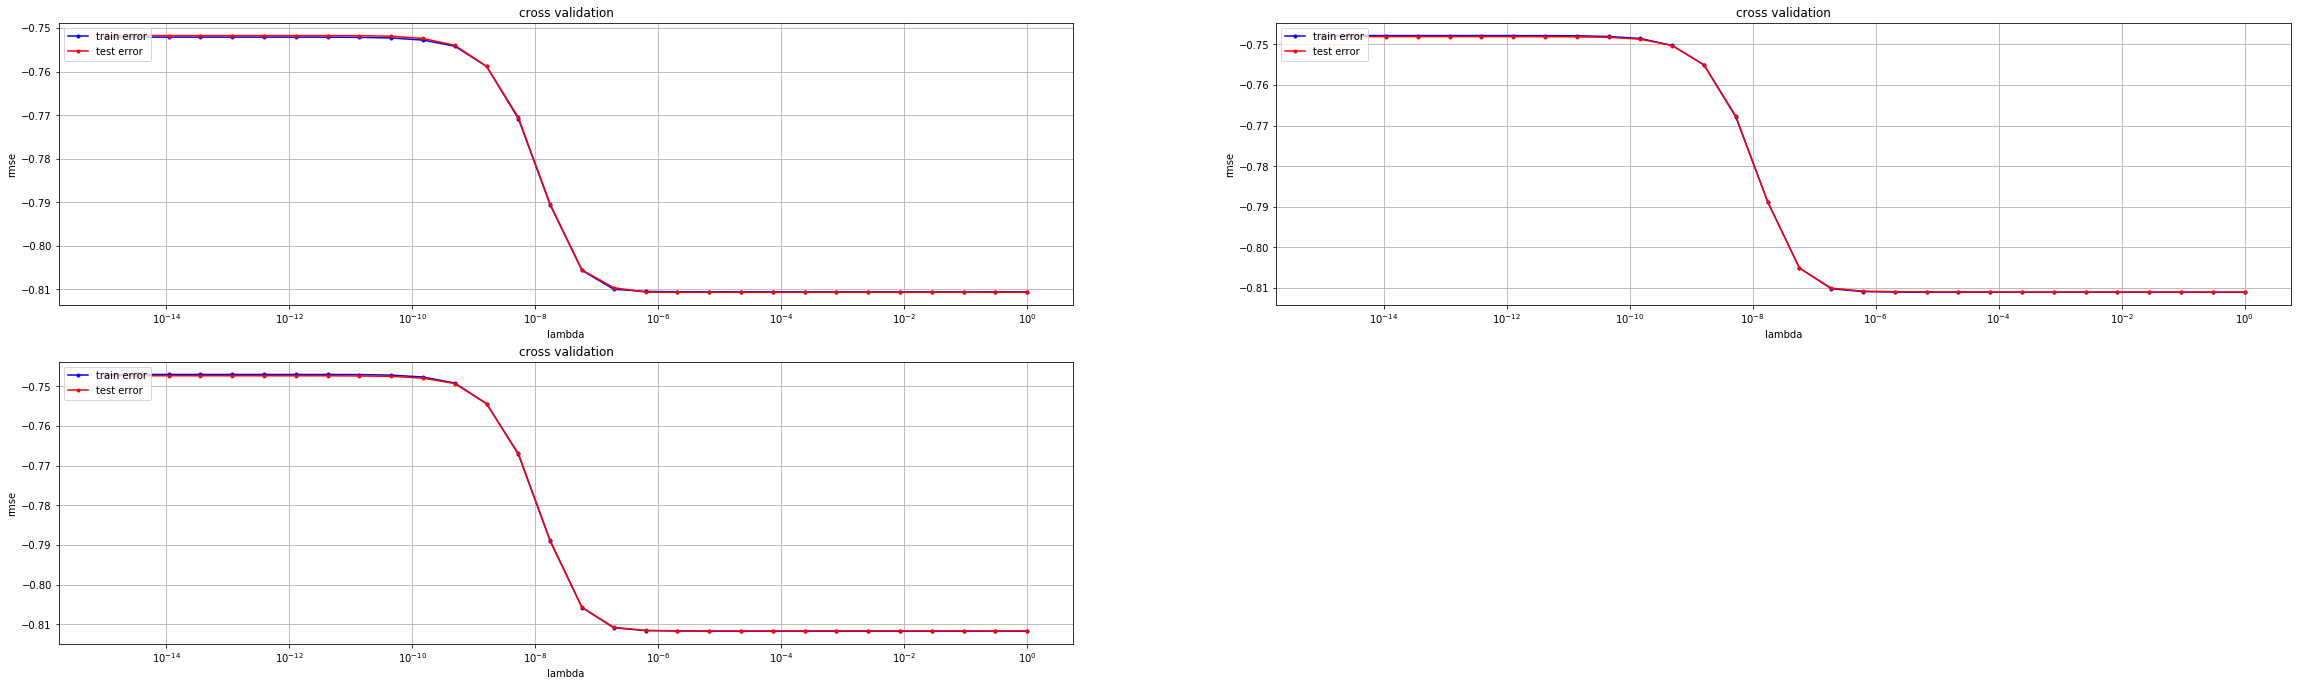

In [340]:
min_gamma0,min_degree0,min_loss0=cross_validation_demo_logistic(y[tX0_dropped_distribution[:,0].astype(int)], tX0_dropped_distribution[:,1:],1,14,index_to_be_skewed0)

min0= np.min(tX0_dropped_distribution[:,1:],axis=0)
max0=np.max(tX0_dropped_distribution[:,1:],axis=0)
tx0=min_max_transform(tX0_dropped_distribution[:,1:],min0,max0)
tx0[:,index_to_be_skewed0]= np.log(tx0[:,index_to_be_skewed0]+1)
tx0_norm,mean0,std0=expand_and_normalize_X(tx0,min_degree0)


w0,loss0=m.logistic_regression(y[tX0_dropped_distribution[:,0].astype(int)],tx0_norm,np.zeros(tx_norm.shape[1]),max_iters,min_gamma0)
min_degree0,min_loss0,loss0

In [ ]:
accuracy(y[tX0_dropped_distribution[:,0].astype(int)],predict_labels(w0,tx0_norm))

In [ ]:
min_lambda1,min_degree1,min_loss1=cross_validation_demo_logistic(y[tX1_dropped_distribution[:,0].astype(int)], tX1_dropped_distribution[:,1:],1,14,index_to_be_skewed1)

min1= np.min(tX1_dropped_distribution[:,1:],axis=0)
max1=np.max(tX1_dropped_distribution[:,1:],axis=0)
tx1=min_max_transform(tX1_dropped_distribution[:,1:],min1,max1)
tx1[:,index_to_be_skewed1]= np.log(tx1[:,index_to_be_skewed1]+1)
tx1_norm,mean1,std1=expand_and_normalize_X(tx1,min_degree1)


w1,loss1=m.logistic_regression(y[tX1_dropped_distribution[:,0].astype(int)],tx1_norm,min_lambda1)
min_degree1,min_loss1,loss1

In [ ]:
accuracy(y[tX1_dropped_distribution[:,0].astype(int)],predict_labels(w1,tx1_norm))

In [ ]:
min_lambda2,min_degree2,min_loss2=cross_validation_demo_logistic(y[tX2_dropped_distribution[:,0].astype(int)], tX2_dropped_distribution[:,1:],1,14,index_to_be_skewed2)

min2= np.min(tX2_dropped_distribution[:,1:],axis=0)
max2=np.max(tX2_dropped_distribution[:,1:],axis=0)
tx2=min_max_transform(tX2_dropped_distribution[:,1:],min2,max2)
tx2[:,index_to_be_skewed2]= np.log(tx2[:,index_to_be_skewed2]+1)
tx2_norm,mean2,std2=expand_and_normalize_X(tx2,min_degree2)


w2,loss2=m.logistic_regression(y[tX2_dropped_distribution[:,0].astype(int)],tx2_norm,min_lambda2)
min_degree2,min_loss2,loss2

In [ ]:
accuracy(y[tX2_dropped_distribution[:,0].astype(int)],predict_labels(w2,tx2_norm))

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '../data/result_logisticUltimate.csv' # TODO: fill in desired name of output file for submission


x0=[]
x1=[]
x2=[]
y0indices=[]
y1indices=[]
y2indices=[]

for index, jet_num in enumerate(tX_test[:,22]):   
    if(int(jet_num)==0):
        x0.append(tX_test[index])
        y0indices.append(index)
    if(int(jet_num)==1):
        x1.append(tX_test[index])
        y1indices.append(index)
    if(int(jet_num)==2 or int(jet_num)==3):
        x2.append(tX_test[index])
        y2indices.append(index)
        
x0=np.array(x0)
x1=np.array(x1)
x2=np.array(x2)

x0=np.delete(x0,[5,6,7,13,24,25,26,27,28,29]-np.ones(10),axis=1)
x0[:,0:1]=number_to_other_number(x0[:,0:1],median0)
###SHOULD WE DO nan_to_median here??
### Also, we take all the test set right(dont drop to have 50-50)?
x0=np.delete(x0,[3,4,7,13,19,20]-np.ones(6),axis=1)

x0=min_max_transform(x0,min0,max0)
#use previous skew_mins
x0[:,index_to_be_skewed0]= np.log(x0[:,index_to_be_skewed0]+1)

x1=np.delete(x1,[5,6,7,13,27,28,29]-np.ones(7),axis=1)
x1[:,0:1]=number_to_other_number(x1[:,0:1],median1)
x1=np.delete(x1,[4,7,19,20]-np.ones(4),axis=1)

x1=min_max_transform(x1,min1,max1)
#use previous skew_mins

x1[:,index_to_be_skewed1]= np.log(x1[:,index_to_be_skewed1]+1)


x2=np.delete(x2,[4,6,22,23,24,27,30]-np.ones(7),axis=1)
x2[:,0:1]=number_to_other_number(x2[:,0:1],median2)
x2=min_max_transform(x2,min2,max2)
#use previous skew_mins

x2[:,index_to_be_skewed2]= np.log(x2[:,index_to_be_skewed2]+1)



##??shouldn't we also use the mean/std of the best cross validation?
x0= build_poly(x0, min_degree0)
x0[:,1:]= (x0[:,1:]-mean0)/std0

x1= build_poly(x1, min_degree1)
x1[:,1:]= (x1[:,1:]-mean1)/std1

x2= build_poly(x2, min_degree2)
x2[:,1:]= (x2[:,1:]-mean2)/std2


y0Predict=predict_labels(w0,x0)
y1Predict=predict_labels(w1,x1)
y2Predict=predict_labels(w2,x2)

y_pred=np.empty(tX_test.shape[0])
y_pred[y0indices]=y0Predict
y_pred[y1indices]=y1Predict
y_pred[y2indices]=y2Predict

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)